# Data Processing

In [3]:
import pandas as pd
import os

# Path to the folder containing your CSV files
folder_path = r'C:\Users\AkselDindisyan\Desktop\3.1 Junior\CS 210\Proje\my-step-count-analysis\Takeout\Fit\Günlük aktivite metrikleri'

# Initialize an empty list to store daily step data
daily_steps_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):  # Process only CSV files
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        data_long_period = pd.read_csv(file_path)
        
        # Ensure 'Adım sayısı' (Step Count) is numeric
        data_long_period['Adım sayısı'] = pd.to_numeric(data_long_period['Adım sayısı'], errors='coerce')
        
        # Calculate total steps for the file
        total_steps = data_long_period['Adım sayısı'].sum()
        
        # Extract the date from the file name or content (assumes date is part of the file name)
        date = file.replace('.csv', '')  # Adjust if necessary
        
        # Append to the list
        daily_steps_list.append({'Date': date, 'Total Steps': total_steps})

# Create a DataFrame with aggregated data
daily_steps_df = pd.DataFrame(daily_steps_list)

# Save the result to a single CSV file
output_path = os.path.join(folder_path, 'aggregated_daily_steps.csv')
daily_steps_df.to_csv(output_path, index=False)

print(f"Aggregated steps saved to {output_path}")


Aggregated steps saved to C:\Users\AkselDindisyan\Desktop\3.1 Junior\CS 210\Proje\my-step-count-analysis\Takeout\Fit\Günlük aktivite metrikleri\aggregated_daily_steps.csv


In [50]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook
from collections import defaultdict
from datetime import datetime

def extract_steps_to_xlsx(xml_file, xlsx_file, group_by="daily"):
    """
    Extracts step data from an Apple Health XML file and writes it to an Excel file.

    Args:
        xml_file (str): Path to the XML file.
        xlsx_file (str): Path to the output Excel file.
        group_by (str): "daily" or "hourly" to group step counts by day or hour.
    """
    # Parse XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Create a dictionary to store step counts
    step_data = defaultdict(int)

    # Extract step records
    for record in root.findall("Record"):
        if record.attrib.get("type") == "HKQuantityTypeIdentifierStepCount":
            # Extract date and step count value
            start_date = record.attrib.get("startDate")
            steps = int(float(record.attrib.get("value")))

            # Parse the timestamp
            date_time = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S %z")

            # Group by day or hour
            if group_by == "daily":
                key = date_time.date()  # Group by date (YYYY-MM-DD)
            elif group_by == "hourly":
                key = date_time.strftime("%Y-%m-%d %H:00")  # Group by hour (YYYY-MM-DD HH:00)
            else:
                raise ValueError("Invalid group_by value. Use 'daily' or 'hourly'.")

            # Aggregate step counts
            step_data[key] += steps

    # Create a new Excel workbook and select the active sheet
    workbook = Workbook()
    sheet = workbook.active

    # Set headers
    headers = ["Date" if group_by == "daily" else "Date & Hour", "Steps"]
    sheet.append(headers)

    # Write step data to Excel
    for key, steps in sorted(step_data.items()):
        sheet.append([key, steps])

    # Save the workbook to the specified file
    workbook.save(xlsx_file)
    print(f"Step data has been successfully written to {xlsx_file}")

# Example usage
extract_steps_to_xlsx(
    "export.xml",
    'Step_Excel_Apple.xlsx',
    group_by="daily"  # Change to "hourly" for hourly grouping and "daily for daily grouping". 
)



Step data has been successfully written to Step_Excel_Apple.xlsx


# Getting Data From Csv

## Get Steps from Android

### Çalış

In [2]:
import pandas as pd

# Path to the CSV file
file_path = 'aggregated_daily_steps.csv'  # Replace with the correct path

# Load the CSV file into a DataFrame
df1 = pd.read_csv(file_path)

# Display the first few rowdf1.head(360)

In [3]:
#Drop last line
df1 = df1[:-1]
#Rename total step to step
df1 = df1.rename(columns={'Total Steps': 'Steps'})

df1.head(360)

,Date,Steps
0,2024-02-11,5677.0
1,2024-02-12,15041.0
2,2024-02-13,6175.0
3,2024-02-14,5797.0
4,2024-02-15,9937.0
...,...,...
327,2025-01-04,3419.0
328,2025-01-05,2307.0
329,2025-01-06,6230.0
330,2025-01-07,5097.0


In [4]:
# Ensure 'Date' is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Filter rows to include only dates on or before 15 December 2024
df1 = df1[df1['Date'] <= pd.Timestamp('2024-12-31')]

# Display the filtered DataFrame
print(df1)


          Date    Steps
0   2024-02-11   5677.0
1   2024-02-12  15041.0
2   2024-02-13   6175.0
3   2024-02-14   5797.0
4   2024-02-15   9937.0
..         ...      ...
319 2024-12-27  12019.0
320 2024-12-28  13150.0
321 2024-12-29   6230.0
322 2024-12-30   5426.0
323 2024-12-31   2371.0

[324 rows x 2 columns]


## Get Steps from Apple

In [5]:
#Plots basic graph

# Load the Excel file
# Replace 'your_health_data.xlsx' with the actual path to your Excel file
df2 = pd.read_excel('Step_Excel_Apple.xlsx')

# Check the data to ensure it loaded correctly
print(df2.head())

# Convert 'Date' column to datetime, if necessary
df2['Date'] = pd.to_datetime(df2['Date'])

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864


In [6]:
df2.head(4000)

,Date,Steps
0,2015-12-16,5829
1,2015-12-17,2589
2,2015-12-18,7136
3,2015-12-19,2697
4,2015-12-20,3864
...,...,...
3188,2024-10-24,892
3189,2024-10-25,2034
3190,2024-10-26,377
3191,2024-10-27,3951


In [7]:
#I eliminated th  step counts after I changed my phone
# Convert 'Date' to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Specify the threshold date
upper_threshold_date = pd.Timestamp('2024-02-10')
lower_threshold_date = pd.Timestamp('2016-01-01')

# Drop rows where 'Date' is greater than the threshold date
df2 = df2[df2['Date'] <= upper_threshold_date]
df2 = df2[df2['Date'] >= lower_threshold_date]


# Display the filtered DataFrame
print(df2)

           Date  Steps
16   2016-01-01   3551
17   2016-01-02   4669
18   2016-01-03   3561
19   2016-01-04   6404
20   2016-01-05   7237
...         ...    ...
2936 2024-02-02  12656
2937 2024-02-03   5869
2938 2024-02-04   7160
2939 2024-02-09     75
2940 2024-02-10   3199

[2925 rows x 2 columns]


## Merging Android and Apple Data

In [8]:
#I have created 8 years of step data only in 2016 -2024

# Convert 'Date' columns to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the two datasets, preserving daily step counts
data_long_period = pd.concat([df1, df2], ignore_index=True)

# Sort by Date
data_long_period = data_long_period.sort_values(by='Date').reset_index(drop=True)

data_long_period.head(4000)

,Date,Steps
0,2016-01-01,3551.0
1,2016-01-02,4669.0
2,2016-01-03,3561.0
3,2016-01-04,6404.0
4,2016-01-05,7237.0
...,...,...
3244,2024-12-27,12019.0
3245,2024-12-28,13150.0
3246,2024-12-29,6230.0
3247,2024-12-30,5426.0


In [10]:
data_long_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3249 non-null   datetime64[ns]
 1   Steps   3249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


In [11]:
print(data_long_period['Date'].duplicated().sum()) 

0


## Adding Aditional Information

In [12]:
#Plots basic graph

# Load the Excel file
# Replace 'your_health_data.xlsx' with the actual path to your Excel file
df3 = pd.read_excel('Manuel_Data.xlsx')

# Convert 'Date' column to datetime, if necessary
df3['Date'] = pd.to_datetime(df3['Date'])

In [13]:
print(df3.head(100))

         Date  Well Being           Sleep Time  Weight  Exams
0  2024-10-05         8.0                  NaN     NaN      0
1  2024-10-06         9.0                  NaN   71.55      0
2  2024-10-07         8.0             22:00:00     NaN      0
3  2024-10-08         9.0  1900-01-01 00:00:00     NaN      0
4  2024-10-09         7.0                  NaN     NaN      0
..        ...         ...                  ...     ...    ...
67 2024-12-11         7.0             22:00:00     NaN      0
68 2024-12-12         6.5             22:15:00     NaN      1
69 2024-12-13         7.5             22:00:00     NaN      0
70 2024-12-14         5.0             22:30:00     NaN      0
71 2024-12-15         6.5             23:30:00   71.15      0

[72 rows x 5 columns]


## Merge Steps with additional data

In [14]:
import pandas as pd

# Merge the two dataframes on the 'Date' column, keeping only rows with dates in `df3`
data_school_period = pd.merge(data_long_period, df3, on="Date", how="right")

# Display the merged dataframe
print(data_school_period)


         Date    Steps  Well Being           Sleep Time  Weight  Exams
0  2024-10-05   6563.0         8.0                  NaN     NaN      0
1  2024-10-06  10662.0         9.0                  NaN   71.55      0
2  2024-10-07   8374.0         8.0             22:00:00     NaN      0
3  2024-10-08  11740.0         9.0  1900-01-01 00:00:00     NaN      0
4  2024-10-09  17448.0         7.0                  NaN     NaN      0
..        ...      ...         ...                  ...     ...    ...
67 2024-12-11   8594.0         7.0             22:00:00     NaN      0
68 2024-12-12   8927.0         6.5             22:15:00     NaN      1
69 2024-12-13  11308.0         7.5             22:00:00     NaN      0
70 2024-12-14  13544.0         5.0             22:30:00     NaN      0
71 2024-12-15  13995.0         6.5             23:30:00   71.15      0

[72 rows x 6 columns]


In [15]:
import pandas as pd

# Ensure both 'Date' columns are in datetime format
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
data_school_period['Date'] = pd.to_datetime(data_school_period['Date']).dt.date

# Dates in `df3` but not in `data_school_period`
dates_in_df3_not_in_school = df3[~df3['Date'].isin(data_school_period['Date'])]

# Dates in `data_school_period` but not in `df3`
dates_in_school_not_in_df3 = data_school_period[~data_school_period['Date'].isin(df3['Date'])]

# Display results
print("Dates in `df3` but not in `data_school_period`:")
print(dates_in_df3_not_in_school)

print("\nDates in `data_school_period` but not in `df3`:")
print(dates_in_school_not_in_df3)


Dates in `df3` but not in `data_school_period`:
Empty DataFrame
Columns: [Date, Well Being, Sleep Time, Weight, Exams]
Index: []

Dates in `data_school_period` but not in `df3`:
Empty DataFrame
Columns: [Date, Steps, Well Being, Sleep Time, Weight, Exams]
Index: []


In [16]:
# Convert the column and date to datetime (if not already)
data_long_period['Date'] = pd.to_datetime(data_long_period['Date']).dt.date

# Define the date to check
date_to_check = pd.to_datetime('2024-11-20').date()

# Check if the date is in the column
is_date_present = date_to_check in data_long_period['Date'].values
print(f"Is the date {date_to_check} present in the column? {is_date_present}")


Is the date 2024-11-20 present in the column? False


In [17]:
#Check if this date exist
#Because when I do inner loop instead of left loop it gives one less row
#Probably this row doesn't exist my step count excels.
print(data_long_period[data_long_period['Date'] == '2024-11-20'])
print(df1[df1['Date'] == '2024-11-20'])
print(df2[df2['Date'] == '2024-11-20'])

Empty DataFrame
Columns: [Date, Steps]
Index: []
Empty DataFrame
Columns: [Date, Steps]
Index: []
Empty DataFrame
Columns: [Date, Steps]
Index: []


# Data Visualisation for Long Term

In [18]:
data_long_period.head(4000)

,Date,Steps
0,2016-01-01,3551.0
1,2016-01-02,4669.0
2,2016-01-03,3561.0
3,2016-01-04,6404.0
4,2016-01-05,7237.0
...,...,...
3244,2024-12-27,12019.0
3245,2024-12-28,13150.0
3246,2024-12-29,6230.0
3247,2024-12-30,5426.0


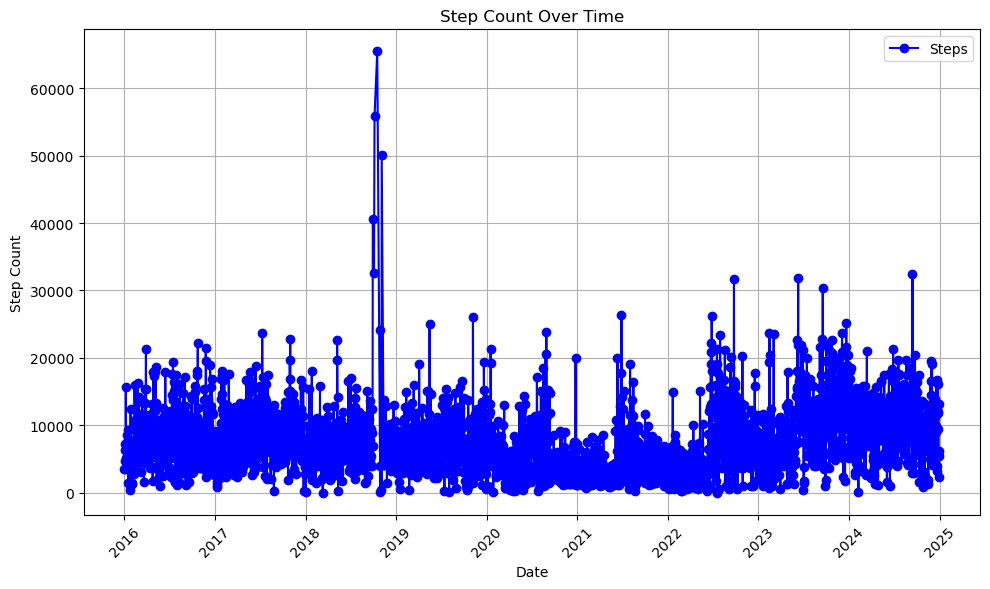

In [19]:
# Ensure 'Date' is in datetime format and drop invalid dates
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'], errors='coerce')

# Drop rows with NaN in the 'Date' column
#data_long_period = data_long_period.dropna(subset=['Date'])

# Plot the step data
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_long_period['Date'], data_long_period['Steps'], marker='o', color='b', label='Steps')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



## Detecting Outliers

Identified Outliers:
           Date    Steps
87   2016-03-28  21304.0
127  2016-05-07  18718.0
196  2016-07-15  19409.0
296  2016-10-23  22168.0
328  2016-11-24  21454.0
...         ...      ...
3132 2024-09-05  18546.0
3141 2024-09-14  32484.0
3151 2024-09-24  20423.0
3215 2024-11-28  19495.0
3219 2024-12-02  19179.0

[85 rows x 2 columns]


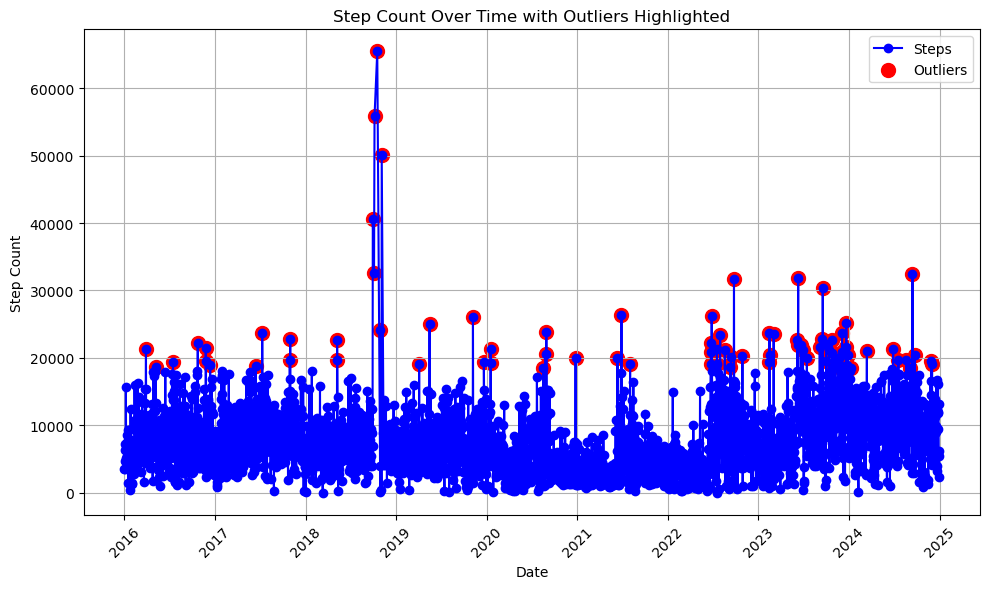

In [20]:
#Finds Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Check the data to ensure it loaded correctly
#print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_long_period['Steps'].quantile(0.25)
Q3 = data_long_period['Steps'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_long_period[(data_long_period['Steps'] < lower_bound) | (data_long_period['Steps'] > upper_bound)]

# Print outliers
print("Identified Outliers:")
print(outliers)

# Plot the data and highlight outliers
plt.figure(figsize=(10, 6))
plt.plot(data_long_period['Date'], data_long_period['Steps'], marker='o', color='b', label='Steps')
plt.scatter(outliers['Date'], outliers['Steps'], color='r', label='Outliers', s=100)
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time with Outliers Highlighted')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



## Printing Histogram

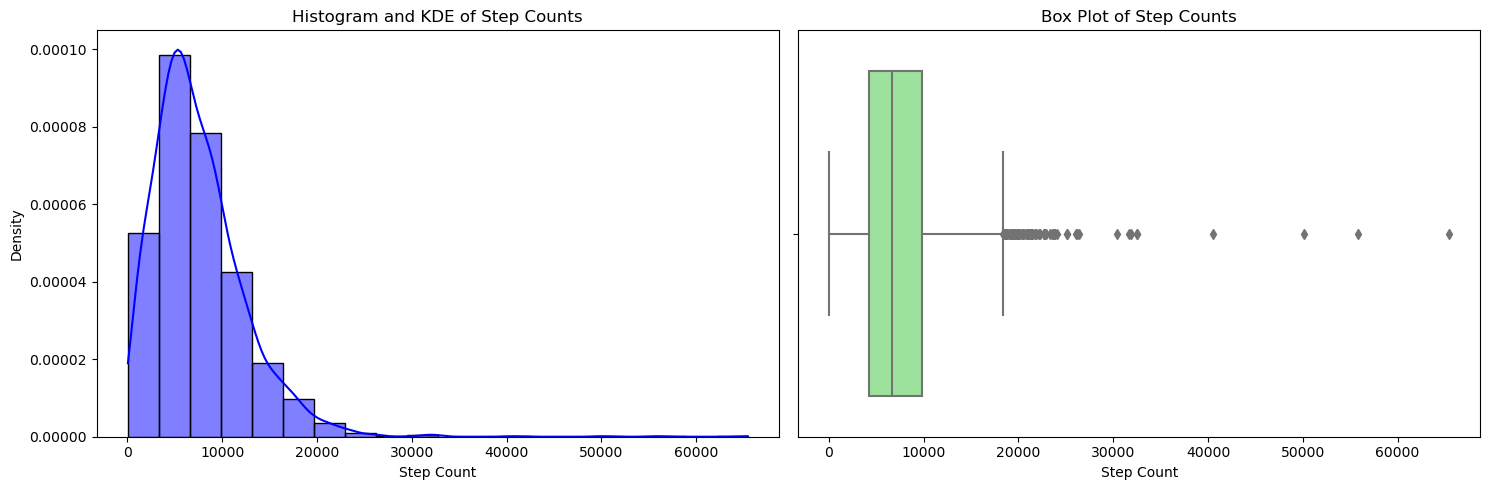

Mean: 7520.62
Standard Deviation: 4848.62
Median: 6641.00


In [21]:
#Step count distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
#print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Plot the distribution of step counts
plt.figure(figsize=(15, 5))

# Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(data_long_period['Steps'], bins=20, kde=True, color='b', stat='density', alpha=0.5)
plt.title('Histogram and KDE of Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Density')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data_long_period['Steps'], color='lightgreen')
plt.title('Box Plot of Step Counts')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data_long_period['Steps'].mean()
std_dev = data_long_period['Steps'].std()
median = data_long_period['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")



## Understanding Data by Years and Months

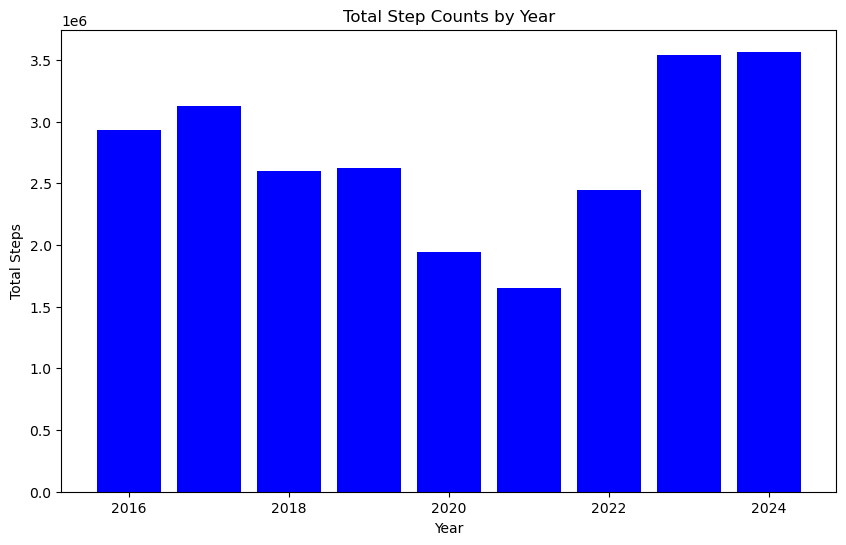

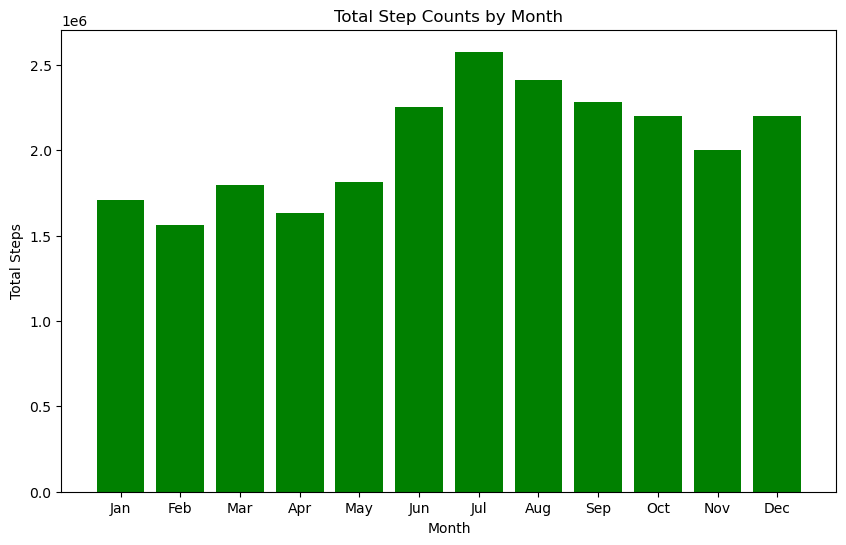

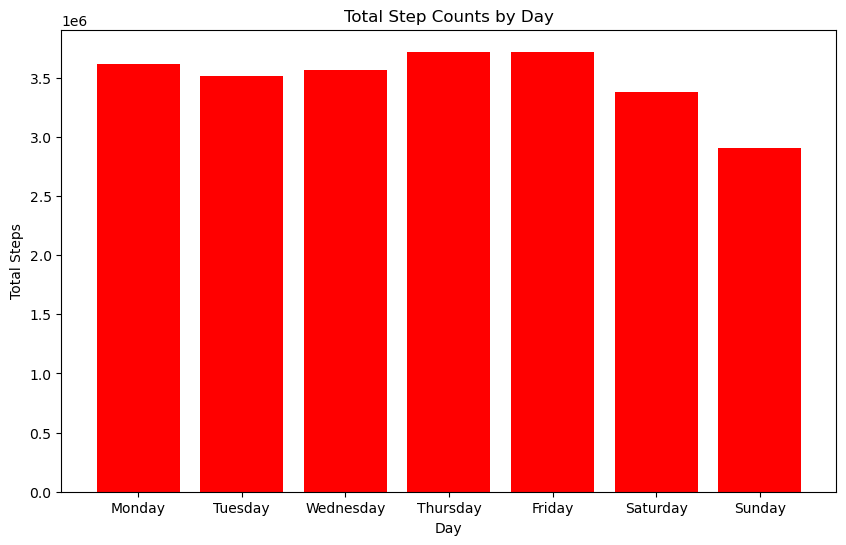

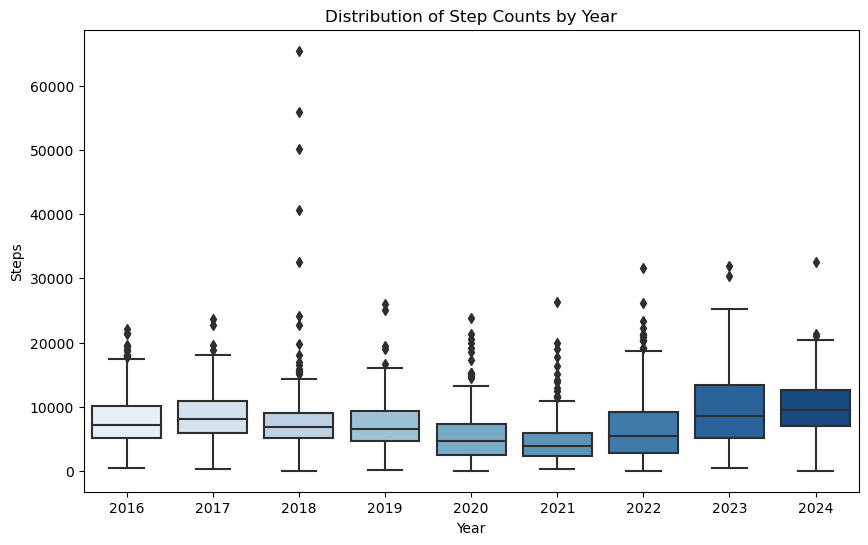

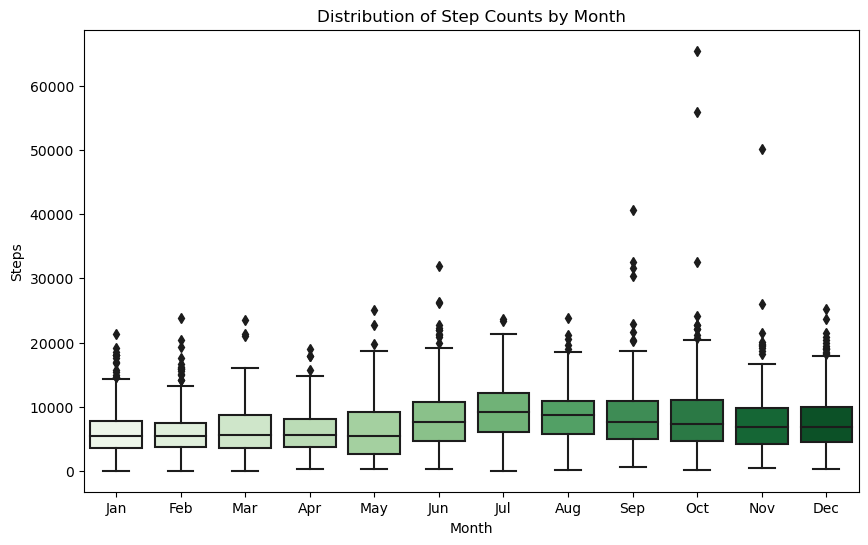

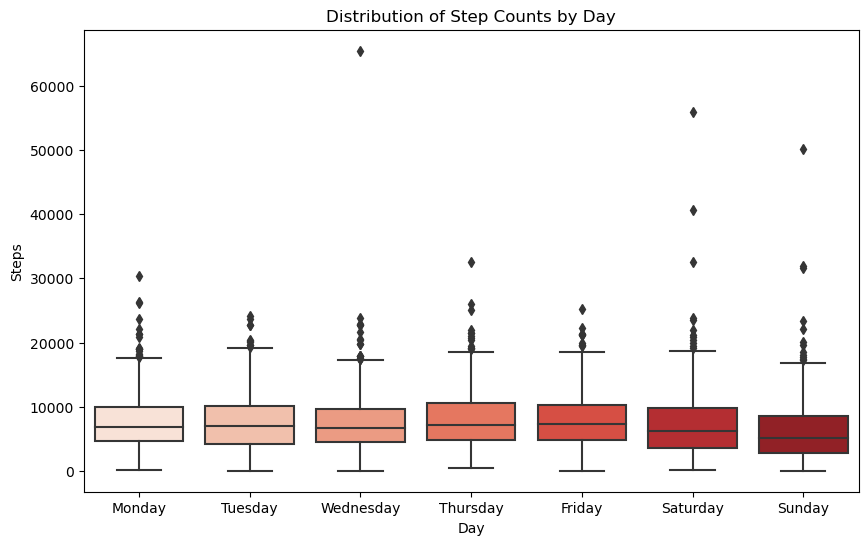

In [22]:
def analyze_and_plot_steps(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Ensure 'Date' is in datetime format
    #data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop rows with missing 'Steps' or 'Date'
    #data = data.dropna(subset=['Steps', 'Date'])

    # Add 'Year', 'Month', and 'Day' columns
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day_name()

    # Group data
    steps_by_year = data.groupby('Year')['Steps'].sum().reset_index()
    steps_by_month = data.groupby('Month')['Steps'].sum().reset_index()
    steps_by_day = data.groupby('Day')['Steps'].sum().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ]).reset_index()

    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_year['Year'], steps_by_year['Steps'], color='blue')
    plt.title("Total Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Total Steps")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_month['Month'], steps_by_month['Steps'], color='green')
    plt.title("Total Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Steps")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_day['Day'], steps_by_day['Steps'], color='red')
    plt.title("Total Step Counts by Day")
    plt.xlabel("Day")
    plt.ylabel("Total Steps")
    plt.show()

    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Year'], y=data['Steps'], palette="Blues")
    plt.title("Distribution of Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Steps")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Month'], y=data['Steps'], palette="Greens")
    plt.title("Distribution of Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Steps")
    plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Day'], y=data['Steps'], palette="Reds", order=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    plt.title("Distribution of Step Counts by Day")
    plt.xlabel("Day")
    plt.ylabel("Steps")
    plt.show()

# Example usage
analyze_and_plot_steps(data_long_period)



# Data Analysis and Hypothesis Testing for Long Period

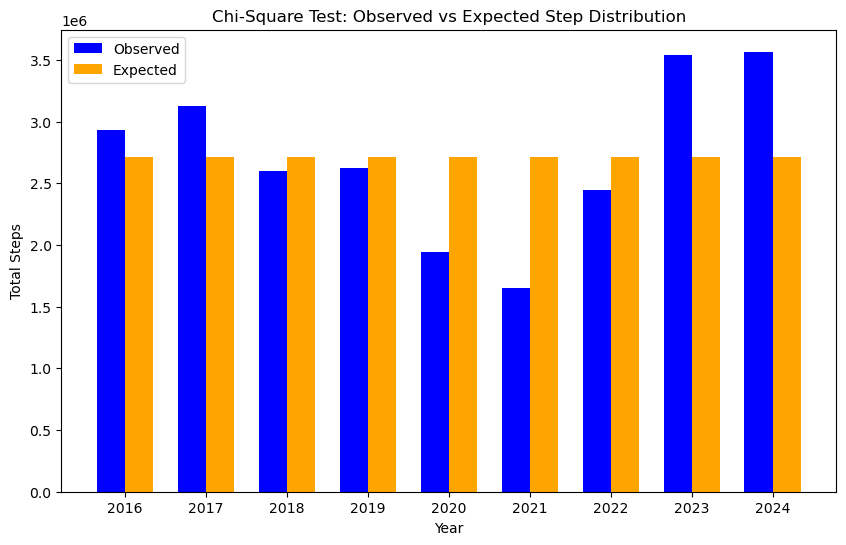

Chi-Square Statistic: 1267088.620322314
p-value: 0.0
Reject the null hypothesis: Step counts are not uniformly distributed across years.


In [23]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Extract years from data_long_period
data_long_period['Year'] = data_long_period['Date'].dt.year

# Count the total steps per year
steps_per_year = data_long_period.groupby('Year')['Steps'].sum()

# Observed frequencies (total steps for each year)
observed = steps_per_year.values

# Expected frequencies (uniform distribution: mean of observed values)
expected = np.full_like(observed, observed.mean())

# Labels for the years
year_labels = steps_per_year.index.values

# Plot observed vs expected frequencies
x = np.arange(len(year_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, observed, width, label='Observed', color='blue')
bars2 = ax.bar(x + width/2, expected, width, label='Expected', color='orange')

ax.set_xlabel('Year')
ax.set_ylabel('Total Steps')
ax.set_title('Chi-Square Test: Observed vs Expected Step Distribution')
ax.set_xticks(x)
ax.set_xticklabels(year_labels)
ax.legend()

plt.show()

# Perform Chi-Square Goodness-of-Fit Test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Statistic:", chi_stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Step counts are not uniformly distributed across years.")
else:
    print("Fail to reject the null hypothesis: Step counts are uniformly distributed across years.")


In [24]:
from scipy.stats import ttest_ind

# Function to perform t-test and print results
def perform_t_test(group1, group2, alpha=0.05):
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')  # Welch's t-test
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Result: Significant difference (p < {alpha})")
    else:
        print(f"Result: No significant difference (p >= {alpha})")
    print()


In [25]:
from scipy.stats import ttest_ind

def one_tailed_t_test(group1, group2, direction, alpha=0.05):
    """
    Perform a corrected one-tailed t-test.

    Parameters:
        group1 (array-like): Data for the first group.
        group2 (array-like): Data for the second group.
        direction (str): Direction of the test ('greater' or 'less').
        alpha (float): Significance level. Default is 0.05.

    Returns:
        t_stat (float): T-statistic value.
        p_value (float): Adjusted one-tailed p-value.
        conclusion (str): Test result.
    """
    # Perform the two-tailed t-test
    t_stat, p_value_two_tailed = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')

    # Adjust for one-tailed p-value based on the direction
    if direction == 'greater':
        if t_stat > 0:
            p_value_one_tailed = p_value_two_tailed / 2
        else:
            p_value_one_tailed = 1 - p_value_two_tailed / 2
    elif direction == 'less':
        if t_stat < 0:
            p_value_one_tailed = p_value_two_tailed / 2
        else:
            p_value_one_tailed = 1 - p_value_two_tailed / 2
    else:
        raise ValueError("Invalid direction. Use 'greater' or 'less'.")

    # Determine conclusion
    if p_value_one_tailed < alpha:
        conclusion = "Significant difference (p < alpha)"
    else:
        conclusion = "No significant difference (p >= alpha)"

    return t_stat, p_value_one_tailed, conclusion


## Weekend vs Weekdays

        Date   Steps  Year  Month       Day
0 2016-01-01  3551.0  2016      1    Friday
1 2016-01-02  4669.0  2016      1  Saturday
2 2016-01-03  3561.0  2016      1    Sunday
3 2016-01-04  6404.0  2016      1    Monday
4 2016-01-05  7237.0  2016      1   Tuesday
Mean Steps on Weekends: 6749.08
Mean Steps on Weekdays: 7830.97

Weekend Standard Deviation: 5222.94
Weekday Standard Deviation: 4654.88

Weekend Median: 5794.00
Weekday Median: 7051.00


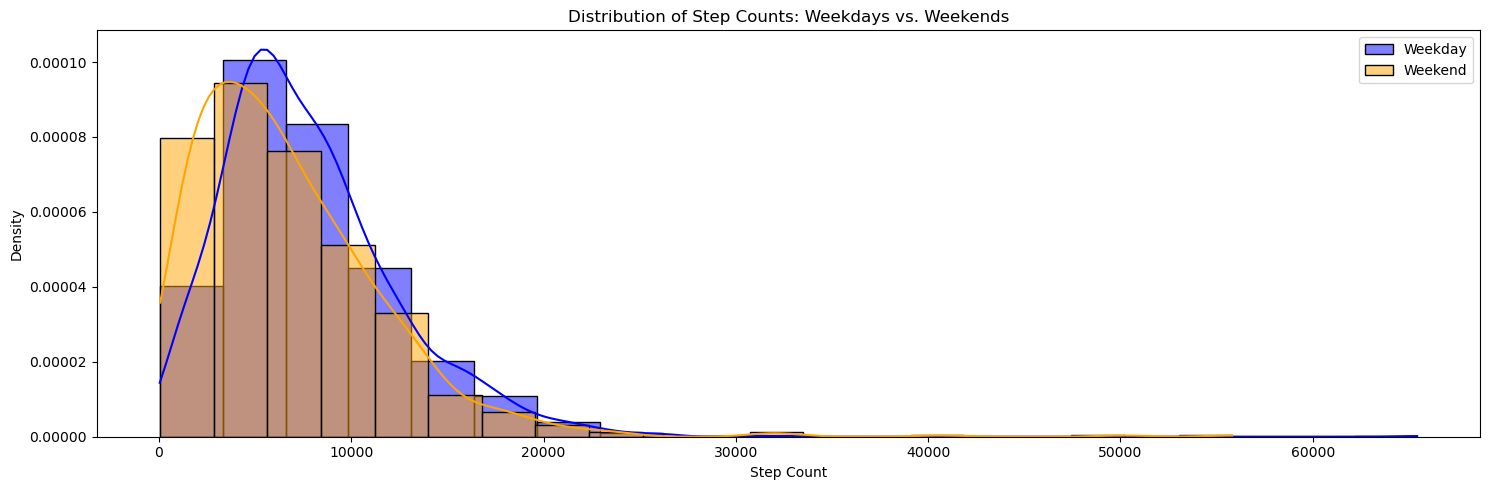

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Create a new column to identify weekends and weekdays
data_long_period['Day_Type'] = data_long_period['Date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate mean step counts for weekends and weekdays
mean_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].mean()
std_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].std()
median_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].median()

mean_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].mean()
std_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].std()
median_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].median()

# Display the means, std, medians
print(f"Mean Steps on Weekends: {mean_weekend:.2f}")
print(f"Mean Steps on Weekdays: {mean_weekday:.2f}")
print()
print(f"Weekend Standard Deviation: {std_weekend:.2f}")
print(f"Weekday Standard Deviation: {std_weekday:.2f}")
print()
print(f"Weekend Median: {median_weekend:.2f}")
print(f"Weekday Median: {median_weekday:.2f}")

# Plot the distribution of step counts for weekends and weekdays
plt.figure(figsize=(15, 5))

# Histogram for Weekdays
sns.histplot(data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'], bins=20, kde=True, color='blue', label='Weekday', stat='density', alpha=0.5)

# Histogram for Weekends
sns.histplot(data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'], bins=20, kde=True, color='orange', label='Weekend', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Weekdays vs. Weekends')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()







In [27]:
# Add a 'Weekend' column
data_long_period['Is Weekend'] = data_long_period['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# Separate groups
weekend_steps = data_long_period[data_long_period['Is Weekend'] == 1]['Steps']
weekday_steps = data_long_period[data_long_period['Is Weekend'] == 0]['Steps']

print("Weekend vs. Weekdays:")
perform_t_test(weekend_steps, weekday_steps)


Weekend vs. Weekdays:
T-statistic: -5.51, P-value: 0.0000
Result: Significant difference (p < 0.05)



In [28]:
# Add 'Is Weekend' column
data_long_period['Is Weekend'] = data_long_period['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# Define groups
weekend_steps = data_long_period[data_long_period['Is Weekend'] == 1]['Steps']
weekday_steps = data_long_period[data_long_period['Is Weekend'] == 0]['Steps']

# Perform one-tailed t-test
t_stat, p_value, result = one_tailed_t_test(weekend_steps,weekday_steps, direction='less')
print("Weekend vs. Weekdays:")
print(f"T-statistic: {t_stat:.2f}, One-tailed P-value: {p_value:.4f}")
print(f"Result: {result}")



Weekend vs. Weekdays:
T-statistic: -5.51, One-tailed P-value: 0.0000
Result: Significant difference (p < alpha)


## Summer Holiday vs School Time

Mean Steps in Summer Months: 8681.25
Mean Steps in Other Months: 6928.98



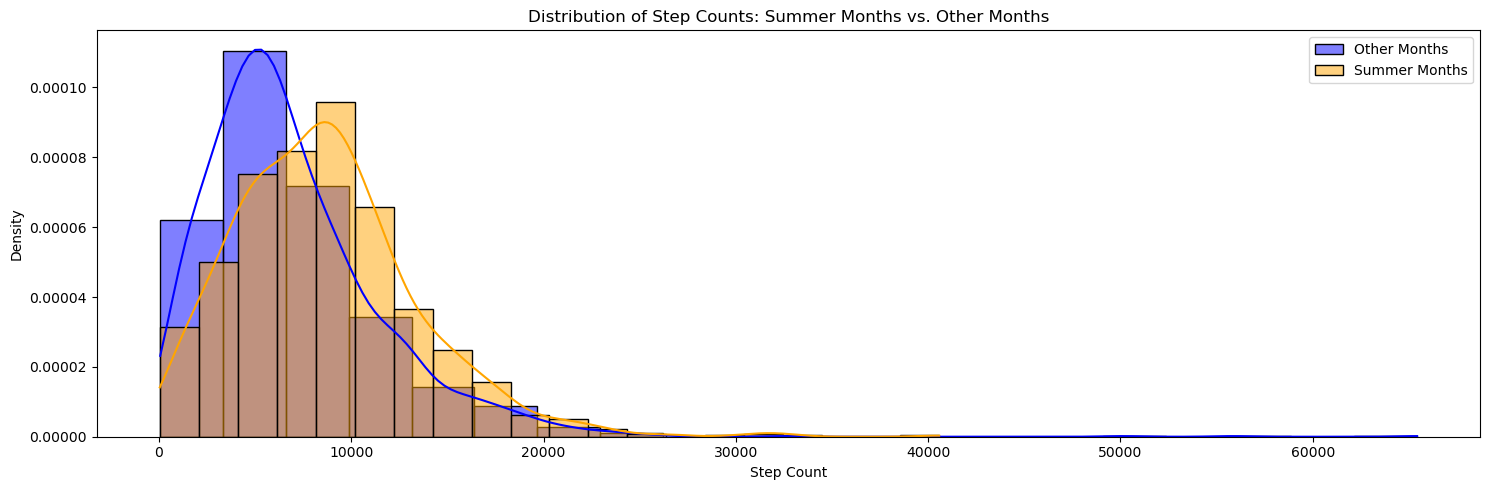

Mean: 7520.62
Standard Deviation: 4848.62
Median: 6641.00


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Create a new column to identify summer and non-summer months
data_long_period['Season'] = data_long_period['Date'].dt.month.apply(lambda x: 'Summer' if x in [6, 7, 8, 9] else 'Other')

# Calculate mean step counts for summer and other months
mean_summer = data_long_period[data_long_period['Season'] == 'Summer']['Steps'].mean()
mean_other = data_long_period[data_long_period['Season'] == 'Other']['Steps'].mean()

# Display the means
print(f"Mean Steps in Summer Months: {mean_summer:.2f}")
print(f"Mean Steps in Other Months: {mean_other:.2f}")
print()

# Plot the distribution of step counts for summer and other months
plt.figure(figsize=(15, 5))

# Histogram for Other Months
sns.histplot(data_long_period[data_long_period['Season'] == 'Other']['Steps'], bins=20, kde=True, color='blue', label='Other Months', stat='density', alpha=0.5)

# Histogram for Summer Months
sns.histplot(data_long_period[data_long_period['Season'] == 'Summer']['Steps'], bins=20, kde=True, color='orange', label='Summer Months', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Summer Months vs. Other Months')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data_long_period['Steps'].mean()
std_dev = data_long_period['Steps'].std()
median = data_long_period['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")


In [30]:
# Define Summer Holiday (e.g., June-August)
data_long_period['Is Summer'] = data_long_period['Date'].dt.month.isin([6, 7, 8, 9]).astype(int)

# Separate groups
summer_steps = data_long_period[data_long_period['Is Summer'] == 1]['Steps']
school_term_steps = data_long_period[data_long_period['Is Summer'] == 0]['Steps']

print("Summer Holiday vs. School Term:")
perform_t_test(summer_steps, school_term_steps)


Summer Holiday vs. School Term:
T-statistic: 9.84, P-value: 0.0000
Result: Significant difference (p < 0.05)



In [31]:
# Add 'Is Summer' column
data_long_period['Is Summer'] = data_long_period['Date'].dt.month.isin([6, 7, 8, 9]).astype(int)

# Define groups
summer_steps = data_long_period[data_long_period['Is Summer'] == 1]['Steps']
school_term_steps = data_long_period[data_long_period['Is Summer'] == 0]['Steps']

# Perform one-tailed t-test
t_stat, p_value, result = one_tailed_t_test(summer_steps, school_term_steps, direction='greater')
print("Summer vs. School Term:")
print(f"T-statistic: {t_stat:.2f}, One-tailed P-value: {p_value:.4f}")
print(f"Result: {result}")

Summer vs. School Term:
T-statistic: 9.84, One-tailed P-value: 0.0000
Result: Significant difference (p < alpha)


## During COVID vs Outside COVID

Mean Steps during COVID: 4737.99
Mean Steps outside COVID: 8075.29



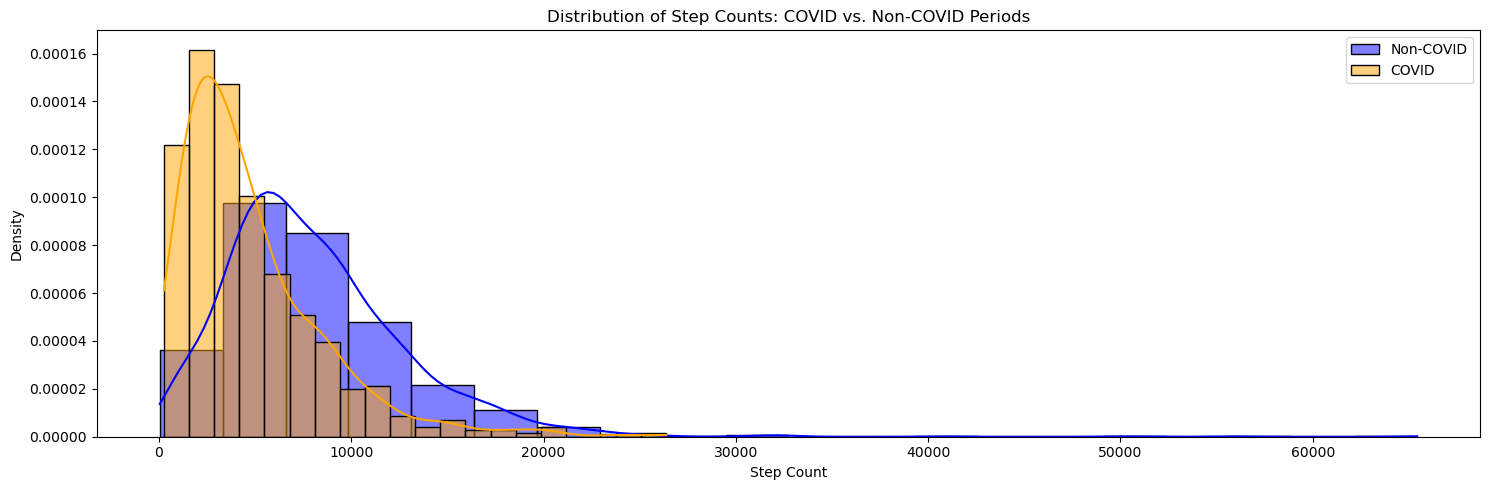

In [32]:
# Add 'COVID Period' column
data_long_period['COVID'] = data_long_period['Date'].apply(
    lambda x: 'COVID' if pd.Timestamp('2020-03-16') <= x <= pd.Timestamp('2021-09-06') else 'Non-COVID'
)

# Calculate mean step counts for COVID and Non-COVID periods
mean_covid = data_long_period[data_long_period['COVID'] == 'COVID']['Steps'].mean()
mean_non_covid = data_long_period[data_long_period['COVID'] == 'Non-COVID']['Steps'].mean()

# Display the means
print(f"Mean Steps during COVID: {mean_covid:.2f}")
print(f"Mean Steps outside COVID: {mean_non_covid:.2f}")
print()

# Plot the distribution of step counts for COVID and Non-COVID periods
plt.figure(figsize=(15, 5))

# Histogram for Non-COVID
sns.histplot(data_long_period[data_long_period['COVID'] == 'Non-COVID']['Steps'], bins=20, kde=True, color='blue', label='Non-COVID', stat='density', alpha=0.5)

# Histogram for COVID
sns.histplot(data_long_period[data_long_period['COVID'] == 'COVID']['Steps'], bins=20, kde=True, color='orange', label='COVID', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: COVID vs. Non-COVID Periods')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
# Add a 'COVID Period' column
data_long_period['Is COVID'] = ((data_long_period['Date'] >= pd.Timestamp('2020-03-16')) & 
                                  (data_long_period['Date'] <= pd.Timestamp('2021-09-06'))).astype(int)

# Separate groups
covid_steps = data_long_period[data_long_period['Is COVID'] == 1]['Steps']
non_covid_steps = data_long_period[data_long_period['Is COVID'] == 0]['Steps']

print("During COVID vs. Outside COVID:")
perform_t_test(covid_steps, non_covid_steps)


During COVID vs. Outside COVID:
T-statistic: -17.94, P-value: 0.0000
Result: Significant difference (p < 0.05)



In [34]:
# Add 'Is COVID' column
data_long_period['Is COVID'] = ((data_long_period['Date'] >= pd.Timestamp('2020-03-16')) & 
                                (data_long_period['Date'] <= pd.Timestamp('2021-09-06'))).astype(int)

# Define groups
covid_steps = data_long_period[data_long_period['Is COVID'] == 1]['Steps']
non_covid_steps = data_long_period[data_long_period['Is COVID'] == 0]['Steps']

# Perform one-tailed t-test
t_stat, p_value, result = one_tailed_t_test(covid_steps, non_covid_steps, direction='less')
print("During COVID vs. Outside COVID:")
print(f"T-statistic: {t_stat:.2f}, One-tailed P-value: {p_value:.4f}")
print(f"Result: {result}")


During COVID vs. Outside COVID:
T-statistic: -17.94, One-tailed P-value: 0.0000
Result: Significant difference (p < alpha)


## Before Uni vs After Uni

Mean Steps during University: 9597.69
Mean Steps outside University: 6820.57



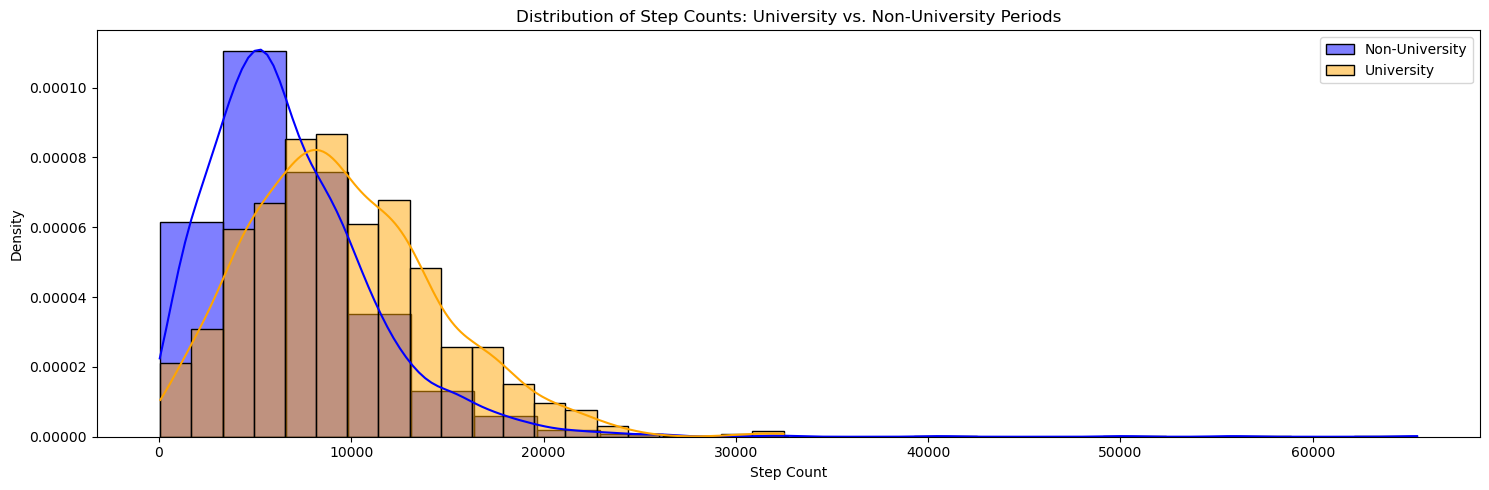

In [35]:
# Add 'University Period' column
data_long_period['University'] = data_long_period['Date'].apply(
    lambda x: 'University' if x >= pd.Timestamp('2022-09-30') else 'Non-University'
)

# Calculate mean step counts for University and Non-University periods
mean_university = data_long_period[data_long_period['University'] == 'University']['Steps'].mean()
mean_non_university = data_long_period[data_long_period['University'] == 'Non-University']['Steps'].mean()

# Display the means
print(f"Mean Steps during University: {mean_university:.2f}")
print(f"Mean Steps outside University: {mean_non_university:.2f}")
print()

# Plot the distribution of step counts for University and Non-University periods
plt.figure(figsize=(15, 5))

# Histogram for Non-University
sns.histplot(data_long_period[data_long_period['University'] == 'Non-University']['Steps'], bins=20, kde=True, color='blue', label='Non-University', stat='density', alpha=0.5)

# Histogram for University
sns.histplot(data_long_period[data_long_period['University'] == 'University']['Steps'], bins=20, kde=True, color='orange', label='University', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: University vs. Non-University Periods')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
# Add a 'University Period' column
data_long_period['Is University'] = (data_long_period['Date'] >= pd.Timestamp('2022-09-30')).astype(int)

# Separate groups
before_uni_steps = data_long_period[data_long_period['Is University'] == 0]['Steps']
after_uni_steps = data_long_period[data_long_period['Is University'] == 1]['Steps']

print("Before Uni vs. After Uni:")
perform_t_test(before_uni_steps, after_uni_steps)


Before Uni vs. After Uni:
T-statistic: -14.06, P-value: 0.0000
Result: Significant difference (p < 0.05)



In [37]:
# Add 'Is University' column
data_long_period['Is University'] = (data_long_period['Date'] >= pd.Timestamp('2022-09-30')).astype(int)

# Define groups
before_uni_steps = data_long_period[data_long_period['Is University'] == 0]['Steps']
after_uni_steps = data_long_period[data_long_period['Is University'] == 1]['Steps']

# Perform one-tailed t-test
t_stat, p_value, result = one_tailed_t_test(before_uni_steps, after_uni_steps, direction='less')
print("Before Uni vs. After Uni:")
print(f"T-statistic: {t_stat:.2f}, One-tailed P-value: {p_value:.4f}")
print(f"Result: {result}")


Before Uni vs. After Uni:
T-statistic: -14.06, One-tailed P-value: 0.0000
Result: Significant difference (p < alpha)


## Year and Months


Yearly Step Statistics:
   Year         mean          std  median
0  2016  8006.106557  4102.139244  7185.0
1  2017  8571.534247  3807.729114  8109.0
2  2018  7858.821752  6247.993441  6834.0
3  2019  7184.504110  3664.427358  6489.0
4  2020  5314.153005  3794.253472  4685.0
5  2021  4527.838356  3191.180675  3833.0
6  2022  6703.197260  5161.499478  5522.0
7  2023  9704.276712  5761.003341  8580.0
8  2024  9877.182825  4352.346159  9542.0

Monthly Step Statistics:
    Month         mean          std  median
0       1  6119.691756  3913.677466  5472.0
1       2  6222.111554  3936.958922  5512.0
2       3  6431.810036  3843.197099  5568.0
3       4  6041.574074  3432.626791  5605.0
4       5  6504.989247  4650.216468  5478.0
5       6  8343.174074  5271.607653  7600.0
6       7  9236.831541  4610.342548  9145.0
7       8  8644.405018  4099.017538  8657.0
8       9  8482.553903  5232.157877  7704.0
9      10  8656.834646  6925.776513  7277.5
10     11  7674.088123  5083.566185  6785.0
11

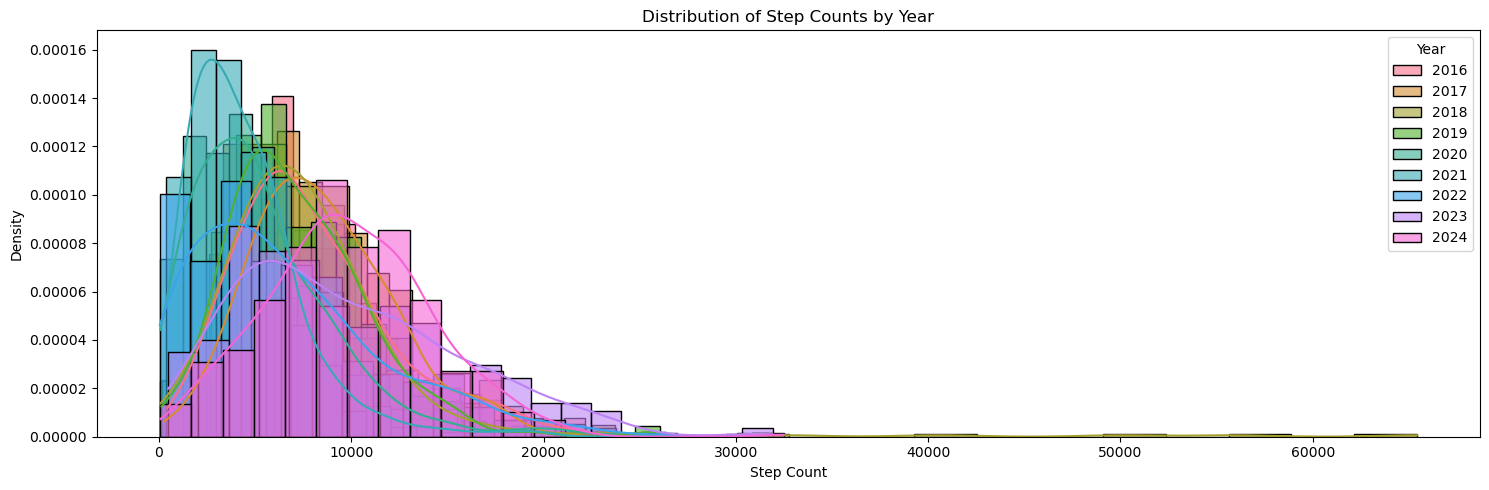

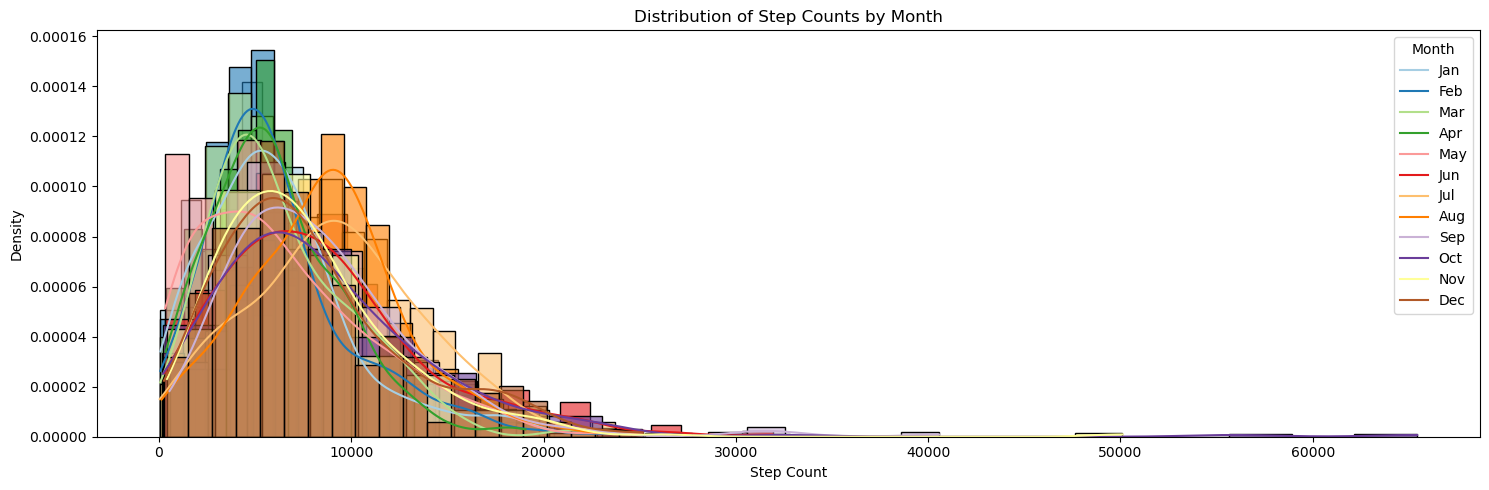

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
#print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Extract Year and Month
data_long_period['Year'] = data_long_period['Date'].dt.year
data_long_period['Month'] = data_long_period['Date'].dt.month

# Calculate mean, std, median for each Year
yearly_stats = data_long_period.groupby('Year')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("Yearly Step Statistics:")
print(yearly_stats)

# Calculate mean, std, median for each Month (across all years)
monthly_stats = data_long_period.groupby('Month')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("\nMonthly Step Statistics:")
print(monthly_stats)

# Generate distinct colors for each year
unique_years = data_long_period['Year'].unique()
colors_years = sns.color_palette("husl", len(unique_years))

# Map colors to years
year_color_map = dict(zip(unique_years, colors_years))

# Plot the distribution of step counts for each year
plt.figure(figsize=(15, 5))
for year in unique_years:
    subset = data_long_period[data_long_period['Year'] == year]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=year_color_map[year], label=f"{year}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Year')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Year', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

# Generate distinct colors for months
colors_months = sns.color_palette("Paired", 12)

# Plot the distribution of step counts for each month
plt.figure(figsize=(15, 5))
for month in range(1, 13):
    subset = data_long_period[data_long_period['Month'] == month]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=colors_months[month - 1], label=f"{month:02d}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Month')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Month', loc='upper right', frameon=True, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()


In [39]:
print(data_long_period.head())

        Date   Steps  Year  Month       Day Day_Type  Is Weekend Season  \
0 2016-01-01  3551.0  2016      1    Friday  Weekday           0  Other   
1 2016-01-02  4669.0  2016      1  Saturday  Weekend           1  Other   
2 2016-01-03  3561.0  2016      1    Sunday  Weekend           1  Other   
3 2016-01-04  6404.0  2016      1    Monday  Weekday           0  Other   
4 2016-01-05  7237.0  2016      1   Tuesday  Weekday           0  Other   

   Is Summer      COVID  Is COVID      University  Is University  
0          0  Non-COVID         0  Non-University              0  
1          0  Non-COVID         0  Non-University              0  
2          0  Non-COVID         0  Non-University              0  
3          0  Non-COVID         0  Non-University              0  
4          0  Non-COVID         0  Non-University              0  


# Machine Learning for Long Period

In [40]:
data_long_period.columns

Index(['Date', 'Steps', 'Year', 'Month', 'Day', 'Day_Type', 'Is Weekend',
       'Season', 'Is Summer', 'COVID', 'Is COVID', 'University',
       'Is University'],
      dtype='object')

Cross-Validation Performance:
Mean MSE across folds: 18579624.40
Mean R-squared across folds: 0.21

Model Performance on Test Data:
Mean Squared Error (MSE): 21887732.29
R-squared (R2): 0.14

Feature Importances:
Year          0.387639
Month         0.365166
Is COVID      0.140230
Is Weekend    0.106965
dtype: float64


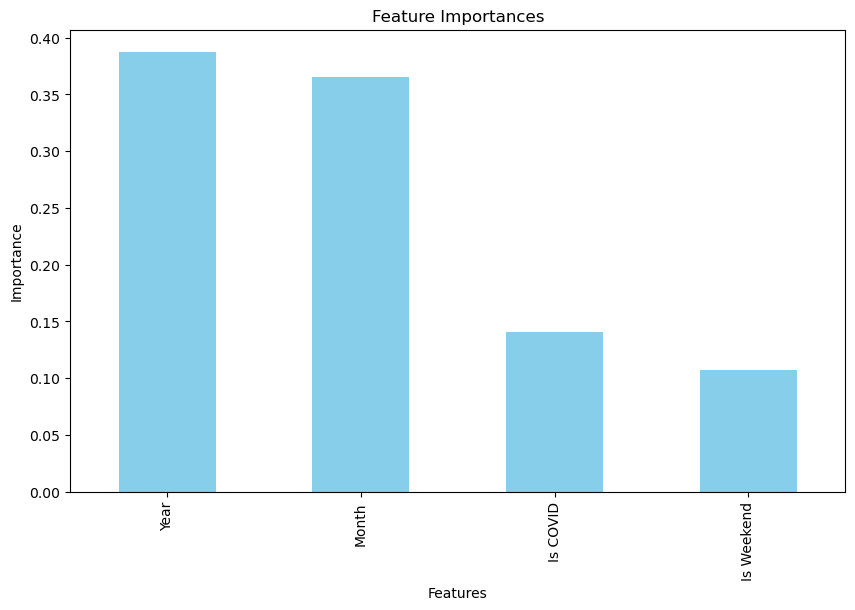

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming data_long_period is already loaded and contains the necessary columns
# Dropping the 'Date' column as it's not suitable for prediction
data = data_long_period.drop(columns=['Date','Is University','Is Summer'])

#data = pd.get_dummies(data, columns=['Day'], drop_first=True)

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Steps', 'Day_Type', 'Day','Season','COVID', 'University'])  # Features
y = data['Steps']  # Target variable

# Handle missing values by filling them with the mean (or use another imputation method if desired)
X = X.fillna(X.mean())

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_mse = -cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')

print("Cross-Validation Performance:")
print(f"Mean MSE across folds: {cross_val_mse.mean():.2f}")
print(f"Mean R-squared across folds: {cross_val_r2.mean():.2f}")

# Train-Test Split for Feature Importance and Final Model Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


# Data Visualisation for School Period

In [42]:
print(data_school_period.columns)

Index(['Date', 'Steps', 'Well Being', 'Sleep Time', 'Weight', 'Exams'], dtype='object')


In [43]:
print(data_school_period.head())

         Date    Steps  Well Being           Sleep Time  Weight  Exams
0  2024-10-05   6563.0         8.0                  NaN     NaN      0
1  2024-10-06  10662.0         9.0                  NaN   71.55      0
2  2024-10-07   8374.0         8.0             22:00:00     NaN      0
3  2024-10-08  11740.0         9.0  1900-01-01 00:00:00     NaN      0
4  2024-10-09  17448.0         7.0                  NaN     NaN      0


In [44]:
import pandas as pd

# Convert 'Date' and 'Sleep Time' to datetime
data_school_period['Date'] = pd.to_datetime(data_school_period['Date'])
data_school_period['Sleep Time'] = pd.to_datetime(data_school_period['Sleep Time'], format='%H:%M:%S', errors='coerce').dt.time

# Adjust sleep times to account for early morning times logically
def adjust_sleep_time_no_date_change(start):
    if pd.isnull(start):  # If 'start' is NaT
        return None
    # Convert the sleep time to total hours in the day
    sleep_hour = start.hour + start.minute / 60 + start.second / 3600
    if sleep_hour <= 4:  # If time is between 00:00 and 04:00, add 24 hours
        sleep_hour += 24
    return sleep_hour

# Apply adjustment function to calculate sleep time in hours
data_school_period['Adjusted Sleep Start Hours'] = data_school_period['Sleep Time'].apply(adjust_sleep_time_no_date_change)
data_school_period.drop(columns=['Sleep Time'], inplace=True)
# Normalize the adjusted sleep hours
#min_sleep = data_school_period['Adjusted Sleep Start Hours'].min()
#max_sleep = data_school_period['Adjusted Sleep Start Hours'].max()
#data_school_period['Normalized Sleep Hours'] = (data_school_period['Adjusted Sleep Start Hours'] - min_sleep) / (max_sleep - min_sleep)

# Output DataFrame
print(data_school_period[['Date','Adjusted Sleep Start Hours']])



         Date  Adjusted Sleep Start Hours
0  2024-10-05                         NaN
1  2024-10-06                         NaN
2  2024-10-07                       22.00
3  2024-10-08                         NaN
4  2024-10-09                         NaN
..        ...                         ...
67 2024-12-11                       22.00
68 2024-12-12                       22.25
69 2024-12-13                       22.00
70 2024-12-14                       22.50
71 2024-12-15                       23.50

[72 rows x 2 columns]


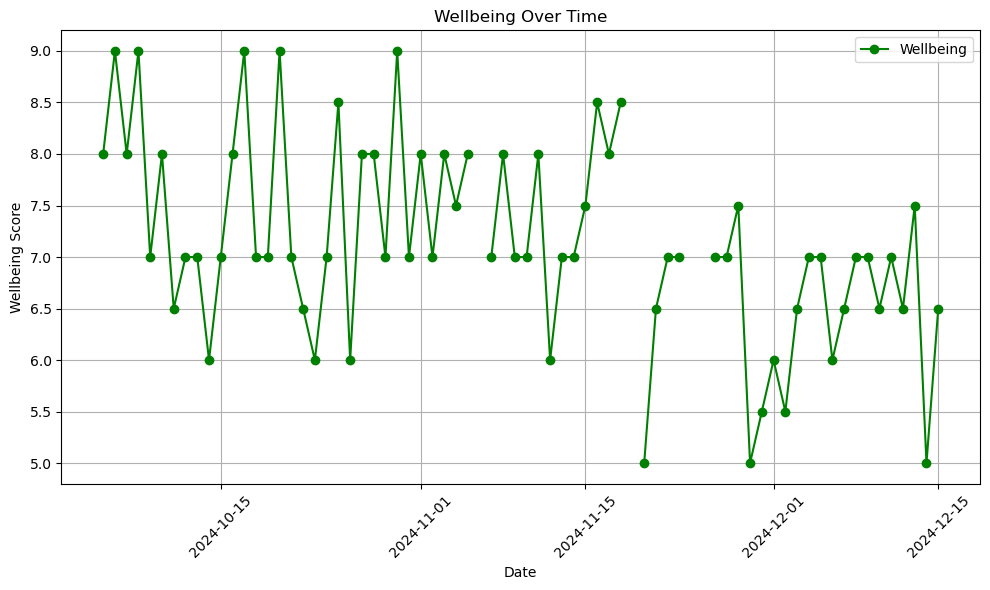

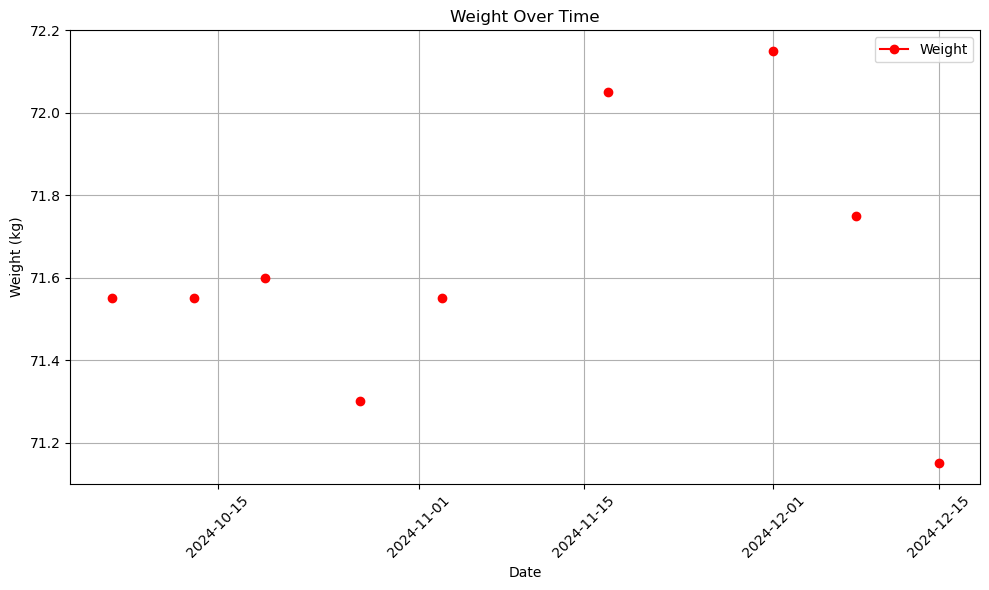

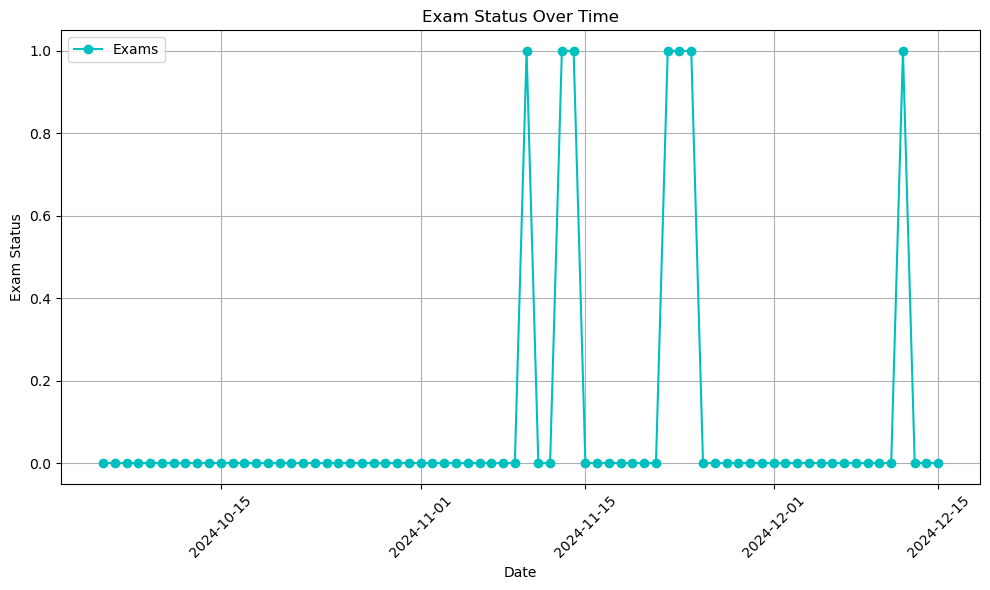

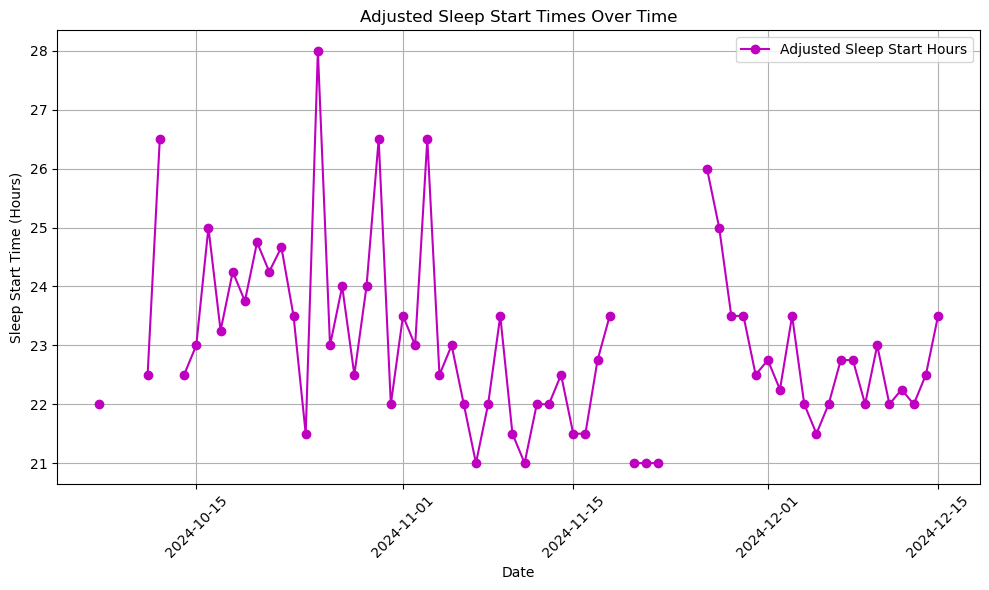

In [45]:
import matplotlib.pyplot as plt

# Wellbeing plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Well Being'], marker='o', color='g', label='Wellbeing')
plt.xlabel('Date')
plt.ylabel('Wellbeing Score')
plt.title('Wellbeing Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Weight plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Weight'], marker='o', color='r', label='Weight')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Weight Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Exam plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Exams'], marker='o', color='c', label='Exams')
plt.xlabel('Date')
plt.ylabel('Exam Status')
plt.title('Exam Status Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Adjusted Sleep Start Hours'], marker='o', color='m', label='Adjusted Sleep Start Hours')
plt.xlabel('Date')
plt.ylabel('Sleep Start Time (Hours)')
plt.title('Adjusted Sleep Start Times Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
#Mark 5 days earlier from exam dates because Is start to work 5 days earlier to each
import pandas as pd

# Ensure 'Date' is in datetime format
data_school_period['Date'] = pd.to_datetime(data_school_period['Date'])

# Get all exam days
exam_days = data_school_period[data_school_period['Exams'] == 1]['Date']

# Mark 5 days before each exam as 1
for exam_date in exam_days:
    mask = (data_school_period['Date'] >= exam_date - pd.Timedelta(days=5)) & (data_school_period['Date'] < exam_date)
    data_school_period.loc[mask, 'Exams'] = 1

# Output updated DataFrame
print(data_school_period[['Date', 'Exams']])


         Date  Exams
0  2024-10-05      0
1  2024-10-06      0
2  2024-10-07      0
3  2024-10-08      0
4  2024-10-09      0
..        ...    ...
67 2024-12-11      1
68 2024-12-12      1
69 2024-12-13      0
70 2024-12-14      0
71 2024-12-15      0

[72 rows x 2 columns]


## Imputate Feature in order to analyze them more effectively

In [47]:
data_school_period.columns

Index(['Date', 'Steps', 'Well Being', 'Weight', 'Exams',
       'Adjusted Sleep Start Hours'],
      dtype='object')

In [48]:
#Imputate weight, well being and sleep time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Select the columns for imputation
columns_to_impute = ['Weight', 'Well Being', 'Adjusted Sleep Start Hours',"Steps"]

# Define the imputer with Random Forest as the estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Apply imputer
data_school_period[columns_to_impute] = imputer.fit_transform(data_school_period[columns_to_impute])

# Check the imputed data
print(data_school_period[columns_to_impute].head())


    Weight  Well Being  Adjusted Sleep Start Hours    Steps
0  71.8760         8.0                      21.610   6563.0
1  71.5500         9.0                      26.610  10662.0
2  71.9160         8.0                      22.000   8374.0
3  71.5375         9.0                      26.595  11740.0
4  71.4765         7.0                      25.420  17448.0


c:\Users\AkselDindisyan\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [49]:
print(data_school_period[columns_to_impute].head(100))

     Weight  Well Being  Adjusted Sleep Start Hours    Steps
0   71.8760         8.0                      21.610   6563.0
1   71.5500         9.0                      26.610  10662.0
2   71.9160         8.0                      22.000   8374.0
3   71.5375         9.0                      26.595  11740.0
4   71.4765         7.0                      25.420  17448.0
..      ...         ...                         ...      ...
67  71.8695         7.0                      22.000   8594.0
68  71.9250         6.5                      22.250   8927.0
69  71.8630         7.5                      22.000  11308.0
70  71.9440         5.0                      22.500  13544.0
71  71.1500         6.5                      23.500  13995.0

[72 rows x 4 columns]


In [50]:
data_school_period.isnull().values.any()

False

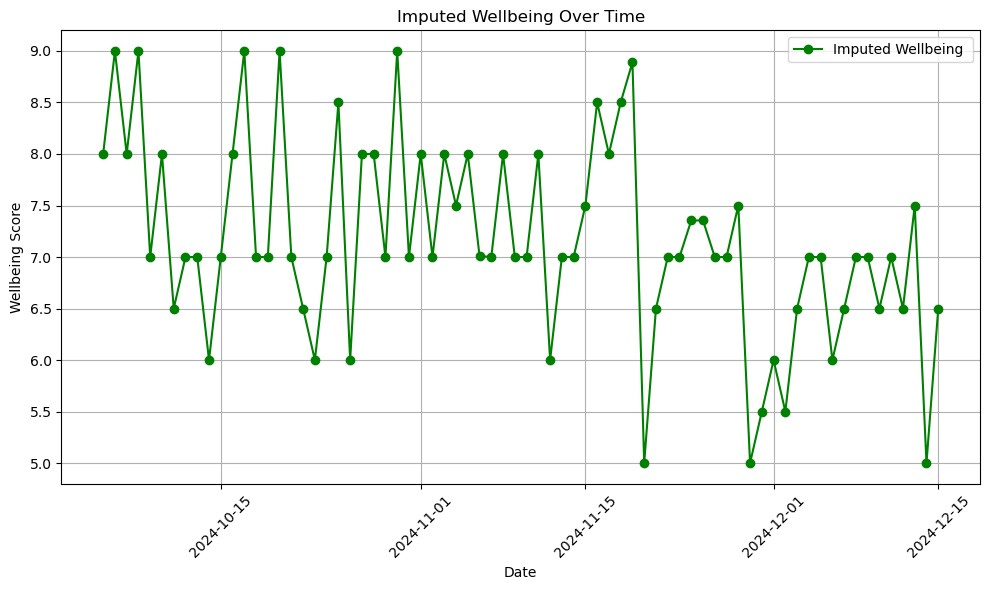

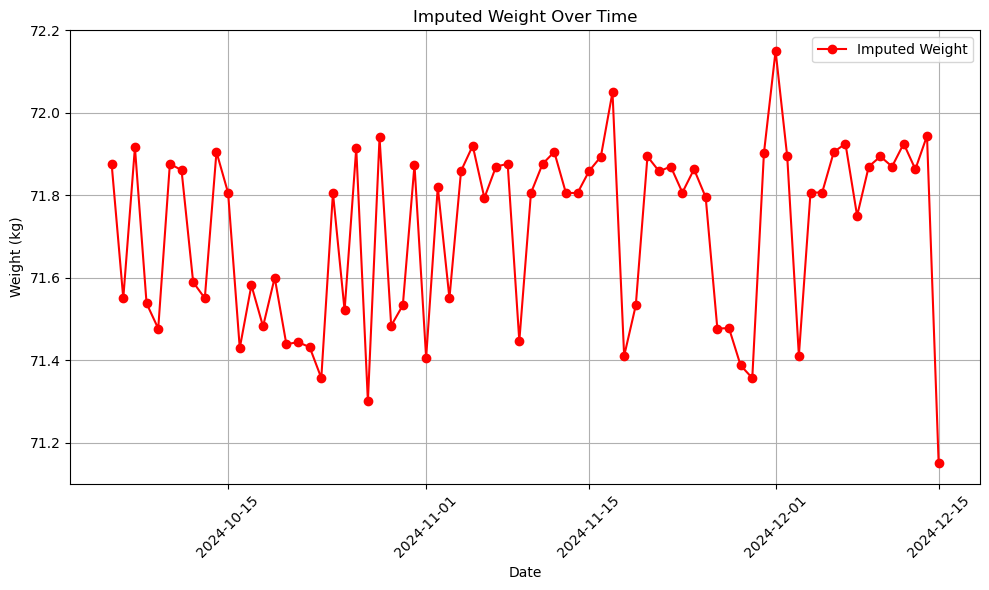

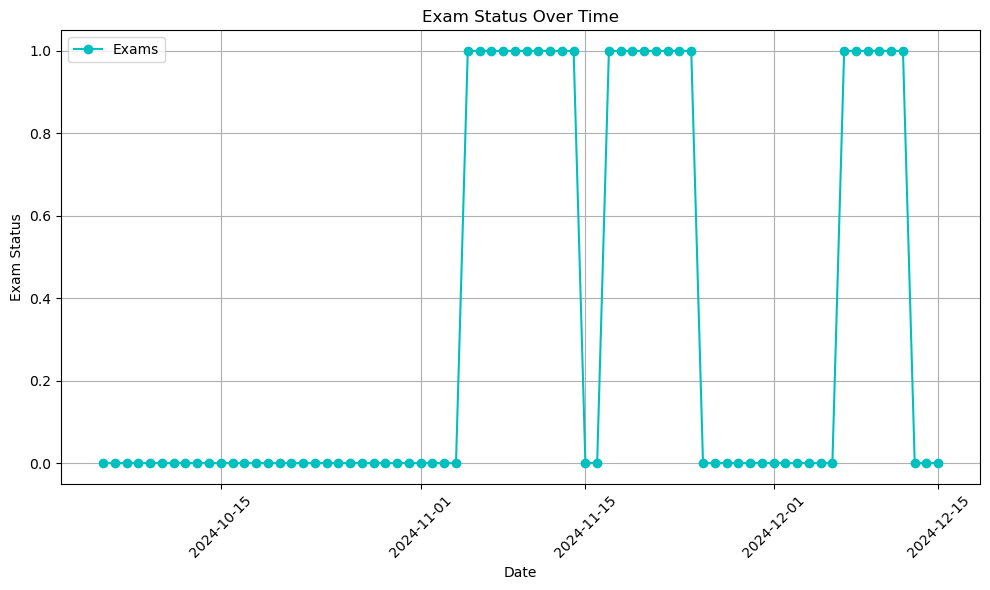

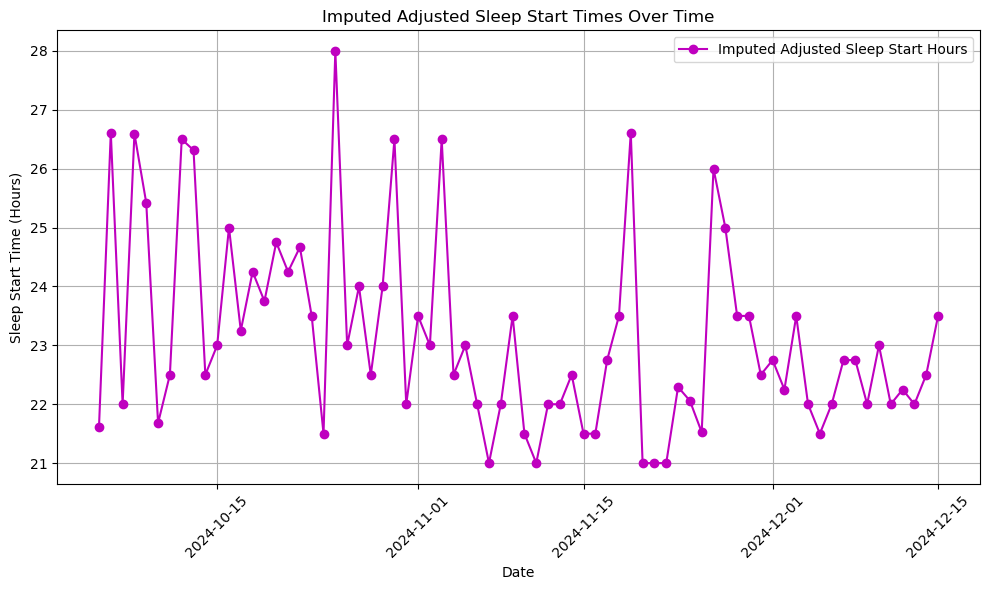

In [51]:
import matplotlib.pyplot as plt

# Wellbeing plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Well Being'], marker='o', color='g', label='Imputed Wellbeing ')
plt.xlabel('Date')
plt.ylabel('Wellbeing Score')
plt.title('Imputed Wellbeing Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Weight plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Weight'], marker='o', color='r', label='Imputed Weight')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Imputed Weight Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Exam plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Exams'], marker='o', color='c', label='Exams')
plt.xlabel('Date')
plt.ylabel('Exam Status')
plt.title('Exam Status Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Adjusted Sleep Start Hours'], marker='o', color='m', label='Imputed Adjusted Sleep Start Hours')
plt.xlabel('Date')
plt.ylabel('Sleep Start Time (Hours)')
plt.title('Imputed Adjusted Sleep Start Times Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Normalise them

In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to normalize
columns_to_normalize = ['Weight', 'Well Being']

# Apply Z-Score normalization
data_school_period[columns_to_normalize] = scaler.fit_transform(data_school_period[columns_to_normalize])

# Normalize the adjusted sleep hours
min_sleep = data_school_period['Adjusted Sleep Start Hours'].min()
max_sleep = data_school_period['Adjusted Sleep Start Hours'].max()
data_school_period['Normalized Sleep Hours'] = (data_school_period['Adjusted Sleep Start Hours'] - min_sleep) / (max_sleep - min_sleep)
data_school_period.drop(columns=['Adjusted Sleep Start Hours'], inplace=True)

# Check the normalized data
print(data_school_period[['Weight', 'Well Being','Normalized Sleep Hours']].head(100))


      Weight  Well Being  Normalized Sleep Hours
0   0.746462    0.868546                0.087143
1  -0.755356    1.912716                0.801429
2   0.930734    0.868546                0.142857
3  -0.812941    1.912716                0.799286
4  -1.093956   -0.175624                0.631429
..       ...         ...                     ...
67  0.716518   -0.175624                0.142857
68  0.972195   -0.697709                0.178571
69  0.686574    0.346461                0.142857
70  1.059725   -2.263964                0.214286
71 -2.598077   -0.697709                0.357143

[72 rows x 3 columns]


In [53]:
print(data_school_period.head(100))


         Date    Steps  Well Being    Weight  Exams  Normalized Sleep Hours
0  2024-10-05   6563.0    0.868546  0.746462      0                0.087143
1  2024-10-06  10662.0    1.912716 -0.755356      0                0.801429
2  2024-10-07   8374.0    0.868546  0.930734      0                0.142857
3  2024-10-08  11740.0    1.912716 -0.812941      0                0.799286
4  2024-10-09  17448.0   -0.175624 -1.093956      0                0.631429
..        ...      ...         ...       ...    ...                     ...
67 2024-12-11   8594.0   -0.175624  0.716518      1                0.142857
68 2024-12-12   8927.0   -0.697709  0.972195      1                0.178571
69 2024-12-13  11308.0    0.346461  0.686574      0                0.142857
70 2024-12-14  13544.0   -2.263964  1.059725      0                0.214286
71 2024-12-15  13995.0   -0.697709 -2.598077      0                0.357143

[72 rows x 6 columns]


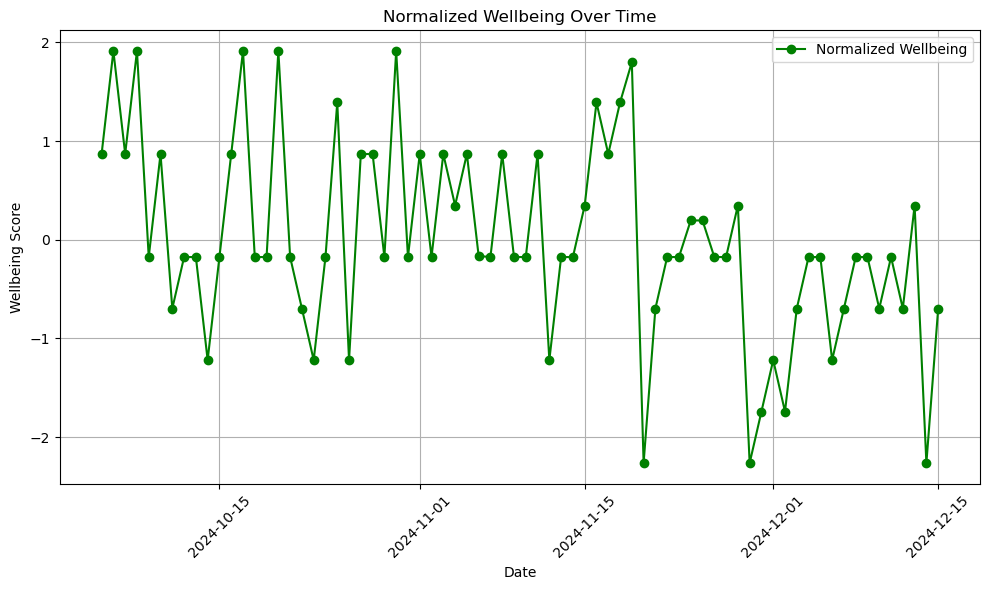

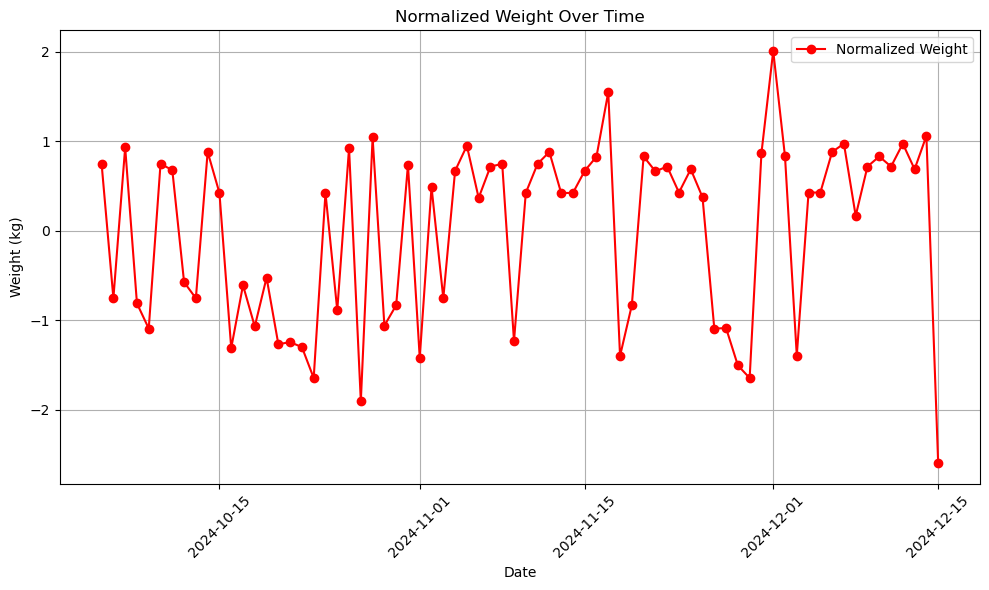

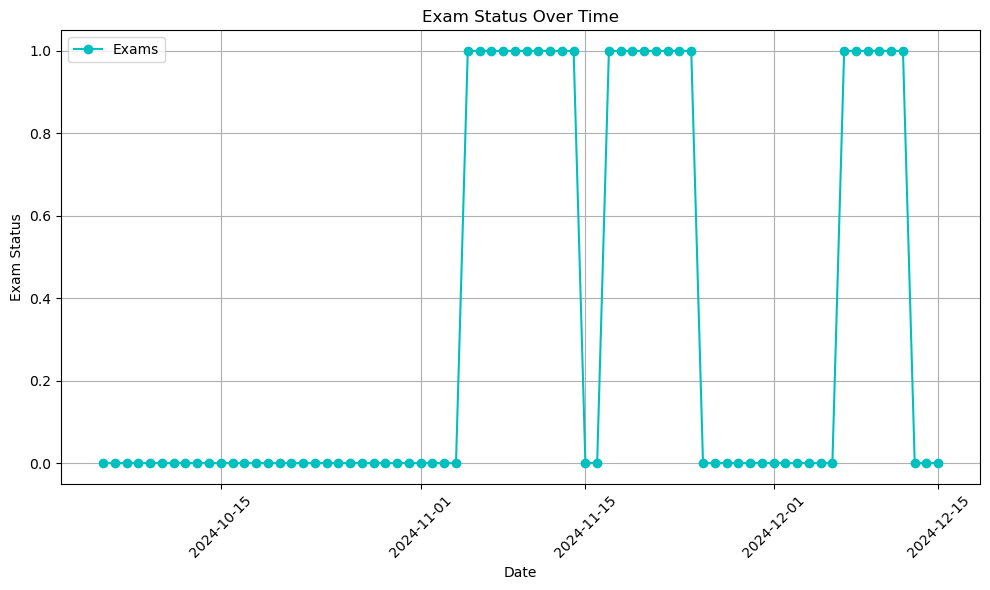

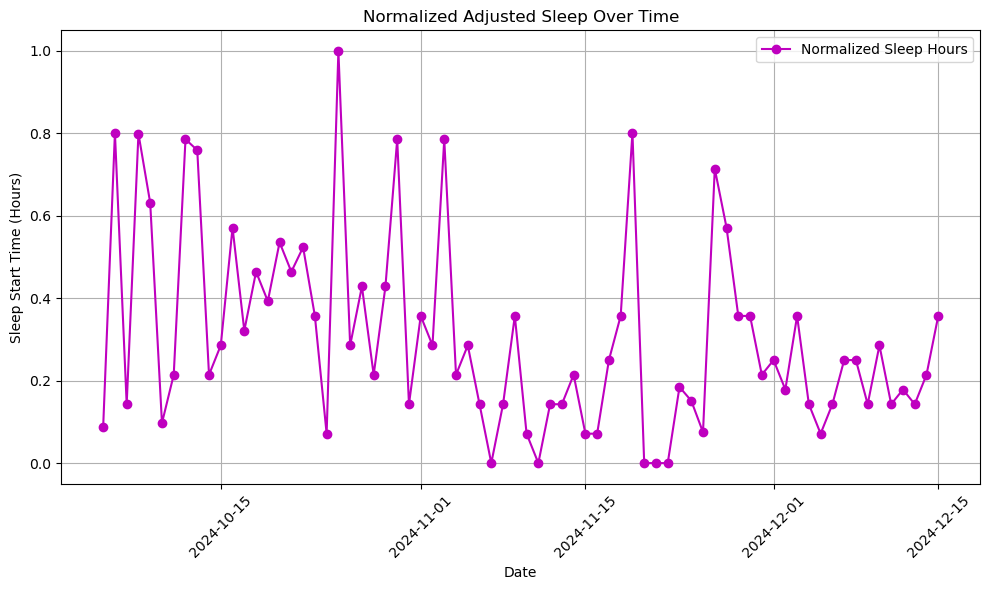

In [63]:
#Plot Normalized Values

# Wellbeing plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Well Being'], marker='o', color='g', label='Normalized Wellbeing')
plt.xlabel('Date')
plt.ylabel('Wellbeing Score')
plt.title('Normalized Wellbeing Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Weight plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Weight'], marker='o', color='r', label='Normalized Weight')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Normalized Weight Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Exam plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Exams'], marker='o', color='c', label='Exams')
plt.xlabel('Date')
plt.ylabel('Exam Status')
plt.title('Exam Status Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Normalized Sleep Hours'], marker='o', color='m', label='Normalized Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Sleep Start Time (Hours)')
plt.title('Normalized Adjusted Sleep Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Data Analysis and Hypothesis Testing for School Term

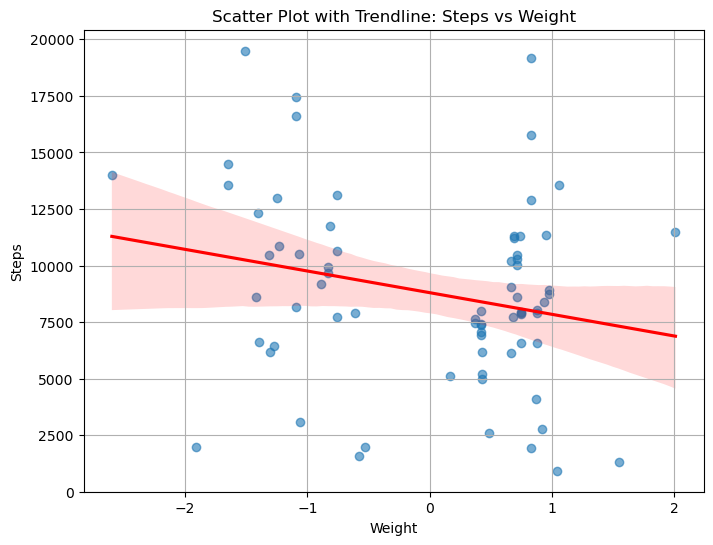

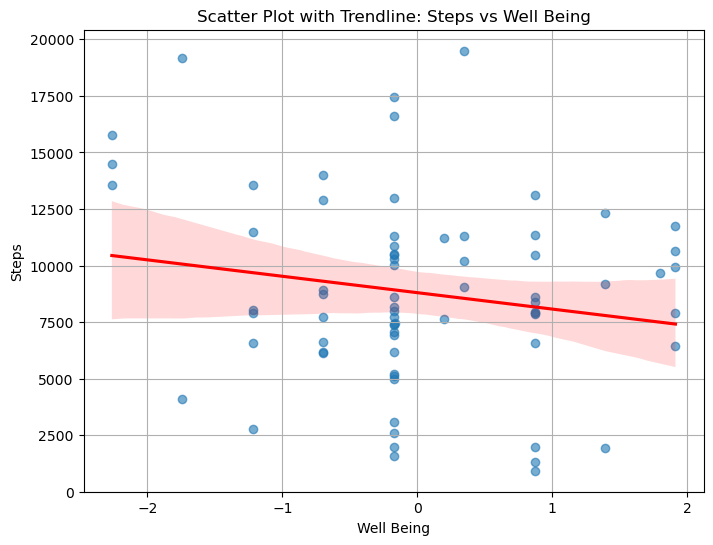

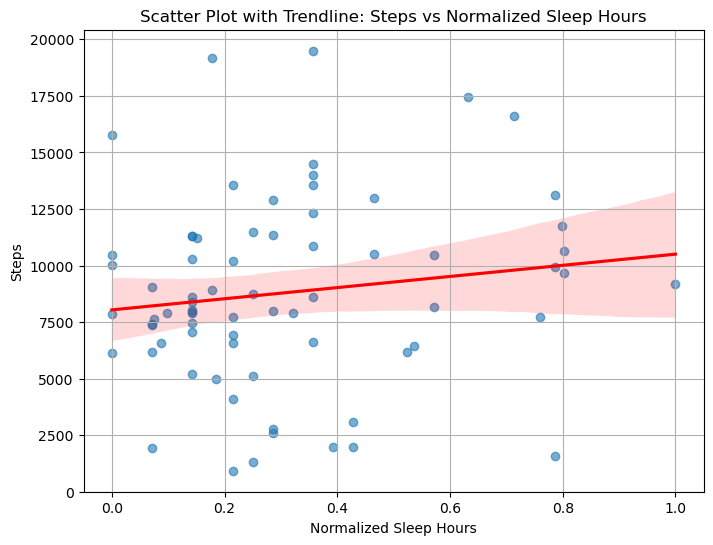

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots with trendlines
normalized_features = ['Weight', 'Well Being', 'Normalized Sleep Hours']

for feature in normalized_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=data_school_period, x=feature, y='Steps', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot with Trendline: Steps vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Steps')
    plt.grid()
    plt.show()


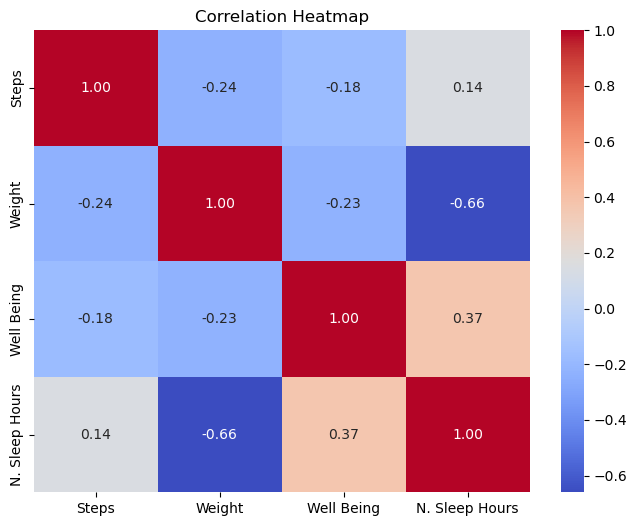

In [66]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data_school_period[['Steps', 'Weight', 'Well Being', 'N. Sleep Hours']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [57]:
median_weight = data_school_period['Weight'].median()
group1 = data_school_period[data_school_period['Weight'] < median_weight]['Steps']
group2 = data_school_period[data_school_period['Weight'] >= median_weight]['Steps']
perform_t_test(group1, group2)


T-statistic: 1.01, P-value: 0.3174
Result: No significant difference (p >= 0.05)



In [58]:
group1 = data_school_period[data_school_period['Exams'] == 0]['Steps']
group2 = data_school_period[data_school_period['Exams'] == 1]['Steps']
perform_t_test(group1, group2)

T-statistic: -0.01, P-value: 0.9918
Result: No significant difference (p >= 0.05)



In [59]:
avg_sleep = data_school_period['Normalized Sleep Hours'].mean()
group1 = data_school_period[data_school_period['Normalized Sleep Hours'] < avg_sleep]['Steps']
group2 = data_school_period[data_school_period['Normalized Sleep Hours'] >= avg_sleep]['Steps']
perform_t_test(group1, group2)

T-statistic: -1.76, P-value: 0.0845
Result: No significant difference (p >= 0.05)



In [60]:
avg_sleep = data_school_period['Well Being'].mean()
group1 = data_school_period[data_school_period['Well Being'] < avg_sleep]['Steps']
group2 = data_school_period[data_school_period['Well Being'] >= avg_sleep]['Steps']
perform_t_test(group1, group2)

T-statistic: 0.15, P-value: 0.8823
Result: No significant difference (p >= 0.05)



In [61]:
data_school_period.columns

Index(['Date', 'Steps', 'Well Being', 'Weight', 'Exams',
       'Normalized Sleep Hours'],
      dtype='object')

# Machine Learning for School Period

Cross-Validation Performance:
Mean MSE across folds: 20026619.75
Mean R-squared across folds: -0.44

Model Performance on Test Data:
Mean Squared Error (MSE): 12723991.49
R-squared (R2): 0.31

Feature Importances:
Weight                    0.714374
Normalized Sleep Hours    0.285626
dtype: float64


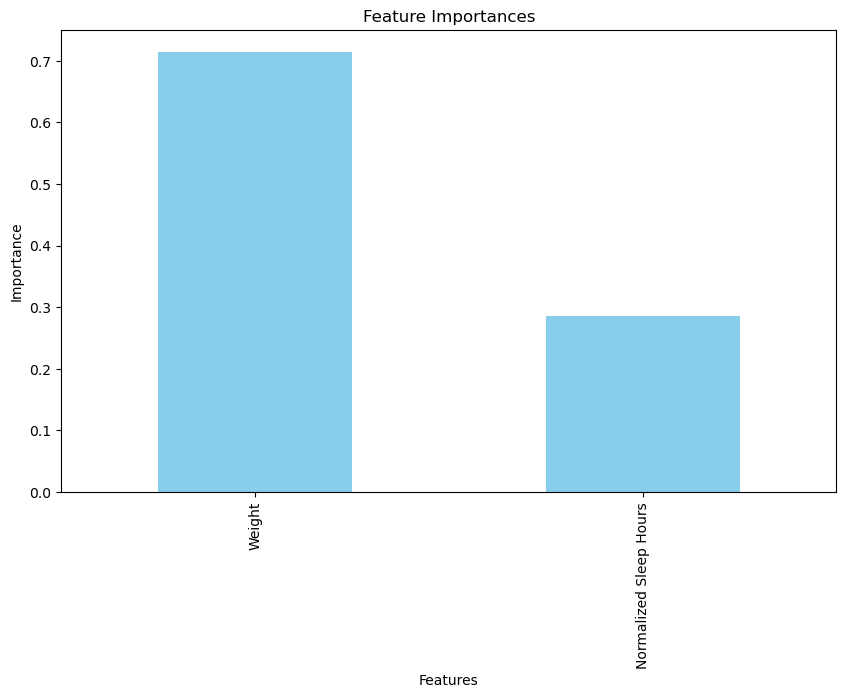

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming data_school_period is already loaded and contains the necessary columns
# Dropping the 'Date' column as it's not suitable for prediction
data = data_school_period.drop(columns=['Date', 'Exams', 'Well Being'])

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Steps'])  # Features
y = data['Steps']  # Target variable

# Handle missing values by filling them with the mean (or use another imputation method if desired)
X = X.fillna(X.mean())

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_mse = -cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')

print("Cross-Validation Performance:")
print(f"Mean MSE across folds: {cross_val_mse.mean():.2f}")
print(f"Mean R-squared across folds: {cross_val_r2.mean():.2f}")

# Train-Test Split for Feature Importance and Final Model Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

